In [83]:
# Import needed by the project

import pandas as pd
import numpy as np
from cmath import nan
import matplotlib.pyplot as plt

%matplotlib inline

In [84]:
# Define the location of the first trades file
prod = 'data/ProdBotz_trades.csv'

# List of pairs traded in the PRODBOT FTX subaccount with the Ichimoku Crypto Strat Bot
ichiprod = ['BAL-PERP', 'REN-PERP', 'ADA-PERP', 'ATOM-PERP']  #2


# List of pairs traded in the PRODBOT FTX subaccount with the VXD Cloud Bot
vxdprod = ['RUNE-PERP', 'SECO-PERP'] #3


# List of pairs traded in the PRODBOT FTX subaccount with the BerlinScript Bot
berlinprod = ['CHZ-PERP', 'NEAR-PERP', 'CRV-PERP', 'LINK-PERP', 'TOMO-PERP', 'FIL-PERP'] #9

allprod = []
allprod.append(ichiprod)
allprod.append(vxdprod)
allprod.append(berlinprod)

In [85]:
# If a position is open, then uncomment the good line
tradeopenp = ['']
#tradeopenp.append('ADA-PERP')
#tradeopenp.append('ATOM-PERP')
#tradeopenp.append('BAL-PERP')
#tradeopenp.append('CHZ-PERP')
#tradeopenp.append('CRV-PERP')
#tradeopenp.append('FIL-PERP')
#tradeopenp.append('LINK-PERP')
#tradeopenp.append('NEAR-PERP')
#tradeopenp.append('REN-PERP')
#tradeopenp.append('RUNE-PERP')
tradeopenp.append('SECO-PERP')
tradeopenp.append('TOMO-PERP')

# If a position is open but a TP was already exited, then uncomment the good line
tradeopenptp = ['']
tradeopenptp.append('RUNE-PERP')
#tradeopenptp.append('SECO-PERP')

In [86]:
# Define the location of the second trades file
test = 'data/TestBotz_trades.csv'


# List of all the pairs traded sorted by strategies. If you don't mention a pair that you trade here, the program will not analyze it.
# List of pairs traded in the TESTBOT FTX subaccount with the Ichimoku Crypto Strat Bot
ichitest = ['NEAR-PERP', 'AXS-PERP',
            'ATOM-PERP', 'CHZ-PERP', 'VET-PERP', 'SXP-PERP', 'LINK-PERP',
            'COMP-PERP', 'ADA-PERP', 'AAVE-PERP', '1INCH-PERP']  #32


# List of pairs traded in the TESTBOT FTX subaccount with the VXD Cloud Bot
vxdtest = ['QTUM-PERP', 'MATIC-PERP', 'CRV-PERP',
            'ASD-PERP', 'FIL-PERP'] #15


# List of pairs traded in the TESTBOT FTX subaccount with the BerlinScript Bot
berlintest = ['DOT-PERP', 'XRP-PERP'] #6

alltest = []
alltest.append(ichitest)
alltest.append(vxdtest)
alltest.append(berlintest)
print(alltest)

[['NEAR-PERP', 'AXS-PERP', 'ATOM-PERP', 'CHZ-PERP', 'VET-PERP', 'SXP-PERP', 'LINK-PERP', 'COMP-PERP', 'ADA-PERP', 'AAVE-PERP', '1INCH-PERP'], ['QTUM-PERP', 'MATIC-PERP', 'CRV-PERP', 'ASD-PERP', 'FIL-PERP'], ['DOT-PERP', 'XRP-PERP']]


In [87]:
# If a position is open, then uncomment the good line
tradeopent = ['']
#tradeopent.append('1INCH-PERP')
#tradeopent.append('AAVE-PERP')
#tradeopent.append('ADA-PERP')
tradeopent.append('ASD-PERP')
#tradeopent.append('ATOM-PERP')
#tradeopent.append('AVAX-PERP')
tradeopent.append('AXS-PERP')
#tradeopent.append('CHZ-PERP')
#tradeopent.append('COMP-PERP')
#tradeopent.append('CRV-PERP')
tradeopent.append('DOT-PERP')
#tradeopent.append('ENJ-PERP')
#tradeopent.append('FIL-PERP')
#tradeopent.append('FXS-PERP')
#tradeopent.append('HOT-PERP')
tradeopent.append('LINK-PERP')
tradeopent.append('MATIC-PERP')
tradeopent.append('NEAR-PERP')
#tradeopent.append('QTUM-PERP')
#tradeopent.append('RON-PERP')
#tradeopent.append('RUNE-PERP')
#tradeopent.append('SCRT-PERP')
#tradeopent.append('STEP-PERP')
#tradeopent.append('SUSHI-PERP')
#tradeopent.append('SXP-PERP')
#tradeopent.append('TONCOIN-PERP')
#tradeopent.append('VET-PERP')
#tradeopent.append('WAVES-PERP')
#tradeopent.append('XRP-PERP')
#tradeopent.append('XTZ-PERP')

# If a position is open but a TP was already exited, then uncomment the good line
tradeopenttp = ['']
#tradeopenttp.append('ASD-PERP')
#tradeopenttp.append('CRV-PERP')
#tradeopenttp.append('FIL-PERP')
#tradeopenttp.append('FXS-PERP')
#tradeopenttp.append('HOT-PERP')
#tradeopenttp.append('QTUM-PERP')
#tradeopenttp.append('RON-PERP')
#tradeopenttp.append('SCRT-PERP')
#tradeopenttp.append('TONCOIN-PERP')

print(tradeopenttp)

['']


In [88]:
alll = []
tradeopen = []
tradeopentp = []
m = 2 #1 #2 # 2 for merge the subaccounts, 0 to analyze only PROD, 1 to analyze only TEST

In [89]:
# Import the trades history excel file - Parsing the CSV file and create 1 DataFrame per market
trades1 = pd.read_csv(prod, dtype={'ID': 'int', 'Quantité': 'float', 'Prix': 'float', 'Total': 'float'}, parse_dates=['Date'])
trades2 = pd.read_csv(test, dtype={'ID': 'int', 'Quantité': 'float', 'Prix': 'float', 'Total': 'float'}, parse_dates=['Date'])

# Import the trades history excel file - Parsing the CSV file and create 1 DataFrame per market
# If m = True then we merge the files, if not we keep them separately
if m == 2:
    trades = trades1.append(trades2)
    alll.append(allprod)
    alll.append(alltest)
    tradeopen.append(tradeopenp)
    tradeopen.append(tradeopent)
    tradeopentp.append(tradeopenptp)
    tradeopentp.append(tradeopenttp)

if m == 0:
    trades = trades1
    alll.append(allprod)
    tradeopen.append(tradeopenp)
    tradeopentp.append(tradeopenptp)

if m == 1:
    trades = trades2
    alll.append(alltest)
    tradeopen.append(tradeopent)
    tradeopentp.append(tradeopenttp)

print(alltest)

[['NEAR-PERP', 'AXS-PERP', 'ATOM-PERP', 'CHZ-PERP', 'VET-PERP', 'SXP-PERP', 'LINK-PERP', 'COMP-PERP', 'ADA-PERP', 'AAVE-PERP', '1INCH-PERP'], ['QTUM-PERP', 'MATIC-PERP', 'CRV-PERP', 'ASD-PERP', 'FIL-PERP'], ['DOT-PERP', 'XRP-PERP']]


In [90]:
# Declaration of the main variables
market=[{}]
marketdf = []
profits=[{}]
profitsdf = []


# Create a list of dictionnaries with the DataFrame and sort it by markets
for index, row in trades.iterrows():
    check = False
    for items in market:
        if index == 0:
            market[0] = {'Marché':[row[2]],'Côté':[row[3]],'Quantité':[row[5]],'Prix':[row[6]],'Total':[row[7]],'Date':[row[1]]}

        elif row[2] in items['Marché']:
            check = True
            
    if check == False and index != 0:
        market.append({'Marché':[row[2]],'Côté':[row[3]],'Quantité':[row[5]],'Prix':[row[6]],'Total':[row[7]],'Date':[row[1]]})


if m == 0:
    for index, row in trades.iterrows():
        for items in market:
            if row[2] in items['Marché'] and any(row[2] in sublist for sublist in allprod):
                items['Marché'].append(row[2])
                items['Côté'].append(row[3])
                items['Quantité'].append(row[5])
                items['Prix'].append(row[6])
                items['Total'].append(row[7])
                items['Date'].append(row[1])

if m == 1:
    for index, row in trades.iterrows():
        for items in market:
            if row[2] in items['Marché'] and any(row[2] in sublist for sublist in alltest):
                items['Marché'].append(row[2])
                items['Côté'].append(row[3])
                items['Quantité'].append(row[5])
                items['Prix'].append(row[6])
                items['Total'].append(row[7])
                items['Date'].append(row[1])

if m == 2:
    for index, row in trades.iterrows():
        for items in market:
            if row[2] in items['Marché'] and (any(row[2] in sublist for sublist in allprod) or any(row[2] in sublist for sublist in alltest)):
                items['Marché'].append(row[2])
                items['Côté'].append(row[3])
                items['Quantité'].append(row[5])
                items['Prix'].append(row[6])
                items['Total'].append(row[7])
                items['Date'].append(row[1])


# Delete the first row which is in double
for items in market:
    marketdf.append(pd.DataFrame(items))

i=0

while i < (len(marketdf)):
    marketdf[i] = marketdf[i].drop([0])
    marketdf[i].reset_index(drop=True, inplace = True)
    i = i + 1

# Deleting the empty dataframes
e=0
while e < (len(marketdf)):

    # Coins with tp
    if str(marketdf[e]['Marché']) == 'Series([], Name: Marché, dtype: object)':
        marketdf.pop(e)
    

    e = e + 1

e=0
while e < (len(marketdf)):
    marketdf[e].reset_index(drop=True, inplace = True)

    # Coins with tp
    if marketdf[e]['Marché'].empty == True:
        #print('bêêê')
        marketdf.pop(e)
    

    e = e + 1

# Deleting the empty dataframes
e=0
while e < (len(marketdf)):

    # Coins with tp
    if str(marketdf[e]['Marché']) == 'Series([], Name: Marché, dtype: object)':
        marketdf.pop(e)
    

    e = e + 1

e=0
while e < (len(marketdf)):
    marketdf[e].reset_index(drop=True, inplace = True)

    # Coins with tp
    if marketdf[e]['Marché'].empty == True:
        #print('bêêê')
        marketdf.pop(e)
    

    e = e + 1



In [91]:
marketdf[5]

,Marché,Côté,Quantité,Prix,Total,Date
0,TOMO-PERP,buy,228.0,0.51620,117.693600,2022-09-09 16:00:25.117276+00:00
1,TOMO-PERP,sell,178.6,0.53385,95.345610,2022-09-09 12:42:59.491999+00:00
2,TOMO-PERP,sell,21.3,0.53385,11.371005,2022-09-09 12:42:58.999068+00:00
3,TOMO-PERP,sell,9.8,0.53385,5.231730,2022-09-09 12:42:55.812273+00:00
4,TOMO-PERP,sell,0.7,0.53385,0.373695,2022-09-09 12:42:54.292466+00:00
5,TOMO-PERP,buy,210.4,0.51930,109.260720,2022-09-09 12:00:26.508762+00:00
6,TOMO-PERP,buy,223.2,0.46945,104.781240,2022-09-07 13:06:35.543093+00:00
7,TOMO-PERP,sell,223.2,0.45970,102.605040,2022-09-07 04:00:13.075995+00:00
8,TOMO-PERP,buy,224.7,0.45555,102.362085,2022-09-07 01:44:56.388074+00:00
9,TOMO-PERP,sell,224.7,0.46115,103.620405,2022-09-07 00:00:13.607922+00:00


In [92]:

# Group the orders in trades

e=0
while e < (len(marketdf)):

    # 1st loop which adds the orders that have the same side and the same date

    lastrow = {'Marché':[], 'Côté':[], 'Quantité':[], 'Prix':[], 'Total':[], 'Date':[]}

    for index, row in marketdf[e].iterrows():
        if index != 0:
            if row[1] == lastrow[1] and row[5] == lastrow[5]:
                row[2] = row[2] + lastrow[2]
                row[3] = ((row[3]*row[2]) + (lastrow[3]*lastrow[2])) / (row[2] + lastrow[2])
                row[4] = row[4] + lastrow[4]
                marketdf[e].loc[(index)]  = row
                marketdf[e] = marketdf[e].drop([index-1])
        lastrow = row

    marketdf[e].reset_index(drop=True, inplace = True)

    e = e + 1


# Deleting the orders that we sum before
e=0
while e < (len(marketdf)):

    # 2nd loop to clean the data by deleting the data that we don't need anymore

    lastrow = {'Marché':[], 'Côté':[], 'Quantité':[], 'Prix':[], 'Total':[], 'Date':[]}

    for index, row in marketdf[e].iterrows():
        if index != 0:
            if row[2] > lastrow[2] and row[1] == lastrow[1] and row[5] == lastrow[5]:
                marketdf[e] = marketdf[e].drop([index-1])
        
        lastrow = row

    marketdf[e].reset_index(drop=True, inplace = True)

    e = e + 1


# Deleting the positions opened by reading the list at the begining of this file, tradeopen and tradeopentp
e=0
while e < (len(marketdf)):

        # 3rd loop which detect close position on different target and dates (Take Profits), add them and average the exit price

    lastrow = {'Marché':[], 'Côté':[], 'Quantité':[], 'Prix':[], 'Total':[], 'Date':[]}

    
    y = True
    z = True
    
    try:
        for index, row in marketdf[e].iterrows():
            if row[0] in tradeopen and y == True:
                marketdf[e] = marketdf[e].drop([0])
                y = False
            marketdf[e].reset_index(drop=True, inplace = True)
    
        for index, row in marketdf[e].iterrows():
            if row[0] in tradeopentp and z == True:
                marketdf[e] = marketdf[e].drop([0])
                marketdf[e] = marketdf[e].drop([1])
                z = False
            marketdf[e].reset_index(drop=True, inplace = True)
    
        for index, row in marketdf[e].iterrows():
            row[2] = round(row[2], 5)
            marketdf[e].loc[(index)]  = row
            marketdf[e].reset_index(drop=True, inplace = True)
    
    except:
        print('La liste des positions ouvertes n\'est pas à jour!')

    e = e + 1


# Group all the exit orders of a position by averaging the price ponderate by each qty
e=0
while e < (len(marketdf)):

    # Coins with tp

    lastrow = {'Marché':[], 'Côté':[], 'Quantité':[], 'Prix':[], 'Total':[], 'Date':[]}

    c = False

    for index, row in marketdf[e].iterrows():
        if index != 0:
            if c == True and round(row[2], 5) == round(lastrow[2], 5):
                marketdf[e].loc[(index-1)]  = lastrow
                c = False

            if  row[1] == lastrow[1] and row[2] > lastrow[2]:
                row[2] = round(row[2] + lastrow[2], 5)
                row[3] = round(((lastrow[2] * lastrow[3]) + (row[2] * row[3])) / (lastrow[2] + row[2]), 5)
                row[4] = round(row[4] + lastrow[4], 5)
                c = True

        lastrow = row
    marketdf[e].reset_index(drop=True, inplace = True)

    e = e + 1


# Deleting the orders that we sum before
e=0
while e < (len(marketdf)):

    # Coins with tp
    lastrow = {'Marché':[], 'Côté':[], 'Quantité':[], 'Prix':[], 'Total':[], 'Date':[]}

    c = False

    for index, row in marketdf[e].iterrows():
        if index != 0:

            if index == 1 and round(row[2], 5) != round(lastrow[2], 5):
                marketdf[e] = marketdf[e].drop([index-1])

            if round(row[2], 5) != round(lastrow[2], 5) and c == True:
                marketdf[e] = marketdf[e].drop([index-1])
                c = False
            
            if round(row[2], 5) != round(lastrow[2], 5):
                c = True
            
            if round(row[2], 5) == round(lastrow[2], 5):
                c = False


        lastrow = row
    marketdf[e].reset_index(drop=True, inplace = True)

    e = e + 1


# Deleting the empty dataframes
e=0
while e < (len(marketdf)):

    # Coins with tp
    if str(marketdf[e]['Marché']) == 'Series([], Name: Marché, dtype: object)':
        marketdf.pop(e)
    

    e = e + 1

e=0
while e < (len(marketdf)):
    marketdf[e].reset_index(drop=True, inplace = True)

    # Coins with tp
    if marketdf[e]['Marché'].empty == True:
        #print('bêêê')
        marketdf.pop(e)
    

    e = e + 1


# Populating profits dictionnaries
e=0
while e < (len(marketdf)):
    marketdf[e].reset_index(drop=True, inplace = True)
    
    # Populating profits dictionnaries by creating 1 dictionnary per market
    for index, row in marketdf[e].iterrows():
        check = False

        if index == 0 and check == False and e == 0:
            profits[0] = {'Marché': [row[0]], 'Side': [], 'Entry': [], 'Exit': [],
            'Profits$': [], 'TotProfits$': [], 'Profits%': [], 'TotProfits%': [], 'ROI': []}
            check = True

        if e > 0:
            check = True

        if index == 0 and check == True:
            profits.append({'Marché': [row[0]], 'Side': [], 'Entry': [], 'Exit': [],
            'Profits$': [], 'TotProfits$': [], 'Profits%': [], 'TotProfits%': [], 'ROI': []})
            
    e = e + 1

profits.pop(0)


# Deleting the empty dataframes
e=0
while e < (len(marketdf)):

    # Coins with tp
    if str(marketdf[e]['Marché']) == 'Series([], Name: Marché, dtype: object)':
        marketdf.pop(e)
    

    e = e + 1


# Populating profits dictionnaries with all trades
e=0
while e < (len(marketdf)):

    lastrow = {'Marché':[], 'Côté':[], 'Quantité':[], 'Prix':[], 'Total':[], 'Date':[]}


    for index, row in marketdf[e].iterrows():
        marketdf[e].reset_index(drop=True, inplace = True)
        if index != 0:
            if row[2] == lastrow[2] and row[1] == 'buy':
                #print('bêêêuy')
                profits[e]['Marché'].append(row[0])
                profits[e]['Side'].append('LONG')
                profits[e]['Entry'].append(row[5])
                profits[e]['Exit'].append(lastrow[5])
                profits[e]['Profits$'].append(lastrow[4] - row[4])
                profits[e]['Profits%'].append(((lastrow[3] - row[3]) / row[3]) * 100)
                profits[e]['ROI'].append((((lastrow[4] - row[4]) / row[4])) * 100)

            if row[2] == lastrow[2] and row[1] == 'sell':
                #print('bêêêll')
                profits[e]['Marché'].append(row[0])
                profits[e]['Side'].append('SHORT')
                profits[e]['Entry'].append(row[5])
                profits[e]['Exit'].append(lastrow[5])
                profits[e]['Profits$'].append(row[4] - lastrow[4])
                profits[e]['Profits%'].append(((row[3] - lastrow[3]) / row[3]) * 100)
                profits[e]['ROI'].append((((row[4] - lastrow[4]) / row[4])) * 100)

        lastrow = row

    e = e + 1


# Converting the dictionnaries into dataframes
for items in profits:
    profitsdf.append(pd.DataFrame.from_dict(items, orient='index'))


# Transpose the columns to rows
i=0
while i < (len(profitsdf)):
    profitsdf[i] = profitsdf[i].transpose()
    
    i = i + 1

# Deleting the empty dataframes
i=0
while i < (len(profitsdf)):
    profitsdf[i] = profitsdf[i][profitsdf[i].Side.notnull()]
    

    i = i + 1

profitsdf.pop()


i=0
while i < (len(profitsdf)):
    for index, row in profitsdf[i].iterrows():
        if row[1] == None:

            profitsdf[e].drop([index], inplace=True)
            profitsdf[e].reset_index(drop=True, inplace = True)

    i = i + 1


# Invert the order of the trades to have the oldest in the begining (useful to make the sum of the profits in the good order, add the oldest profits with the newest)
e=0
while e < (len(profitsdf)):
    profitsdf[e] = profitsdf[e].iloc[::-1]
    profitsdf[e].reset_index(drop=True, inplace = True)
    e=e+1


# Populating the TotProfits$ & TotProfits% columns by summing the profits
e=0
while e < (len(profitsdf)):

    lastrow = {'Marché': [], 'Side': [], 'Entry': [], 'Exit': [],
            'Profits$': [], 'TotProfits$': [], 'Profits%': [], 'TotProfits%': [], 'ROI': []}

    for index, row in profitsdf[e].iterrows():
        profitsdf[e].reset_index(drop=True, inplace = True)
        if index == 0:
            profitsdf[e]['TotProfits$'][index] = profitsdf[e]['Profits$'][index]
            profitsdf[e]['TotProfits%'][index] = profitsdf[e]['Profits%'][index]
        if index !=0:
            profitsdf[e]['TotProfits$'][index] = profitsdf[e]['Profits$'][index] + profitsdf[e]['TotProfits$'][index-1]
            profitsdf[e]['TotProfits%'][index] = profitsdf[e]['Profits%'][index] + profitsdf[e]['TotProfits%'][index-1]

        lastrow = row

    e = e + 1


# Deleting the empty dataframes
e=0
while e < (len(profitsdf)):

    # Coins with tp
    if str(profitsdf[e]['Marché']) == 'Series([], Name: Marché, dtype: object)':
        profitsdf.pop(e)
    

    e = e + 1


e=0
while e < (len(profitsdf)):
    profitsdf[e].reset_index(drop=True, inplace = True)

    if profitsdf[e]['Marché'].empty == True:
        profitsdf.pop(e)
    

    e = e + 1


#marketdf[6]



In [93]:
print(len(profitsdf))
profitsdf[5]

21


,Marché,Side,Entry,Exit,Profits$,TotProfits$,Profits%,TotProfits%,ROI
0,TOMO-PERP,SHORT,2022-08-15 00:00:12.918240+00:00,2022-08-15 06:39:11.871989+00:00,0.115245,0.115245,0.941195,0.941195,0.941195
1,TOMO-PERP,SHORT,2022-08-15 08:00:32.619541+00:00,2022-08-17 08:00:16.291207+00:00,-0.21526,-0.100015,-1.878897,-0.937702,-1.878897
2,TOMO-PERP,SHORT,2022-08-17 16:00:45.358499+00:00,2022-08-17 21:25:56.175841+00:00,0.104,0.003985,0.856091,-0.081611,0.856091
3,TOMO-PERP,SHORT,2022-08-18 20:00:25.966300+00:00,2022-08-18 23:05:23.730841+00:00,0.091375,0.09536,0.7288,0.64719,0.7288
4,TOMO-PERP,SHORT,2022-08-19 00:00:21.588802+00:00,2022-08-19 00:21:50.835429+00:00,0.14696,0.24232,1.530005,2.177194,1.530005
5,TOMO-PERP,SHORT,2022-08-19 04:00:23.295593+00:00,2022-08-19 06:32:30.322837+00:00,0.124815,0.367135,1.486461,3.663655,1.486461
6,TOMO-PERP,SHORT,2022-08-19 08:00:27.265253+00:00,2022-08-19 08:06:36.167578+00:00,0.0354,0.402535,0.598683,4.262338,0.598683
7,TOMO-PERP,LONG,2022-08-24 12:00:37.520203+00:00,2022-08-24 12:19:50.234190+00:00,0.576175,0.97871,0.899281,5.161619,0.899281
8,TOMO-PERP,LONG,2022-08-24 16:00:32.493310+00:00,2022-08-25 05:33:43.925196+00:00,0.65618,1.63489,1.00982,6.171439,1.00982
9,TOMO-PERP,LONG,2022-08-25 08:00:26.854100+00:00,2022-08-26 01:51:32.286470+00:00,0.33898,1.97387,0.618069,6.789508,0.618069


Profits and Nb of trades calculation

In [94]:
print(len(profitsdf))
# List of all the markets analyzed
i=0
while i < (len(profitsdf)):
    for index, row in profitsdf[i].iterrows():
        if index == 0:
            print(row[0])

    i = i + 1
    
    

21
ATOM-PERP
REN-PERP
ADA-PERP
LINK-PERP
ATOM-PERP
TOMO-PERP
NEAR-PERP
CRV-PERP
CHZ-PERP
BAL-PERP
SECO-PERP
RUNE-PERP
FIL-PERP
MATIC-PERP
DOT-PERP
AXS-PERP
ASD-PERP
AAVE-PERP
1INCH-PERP
COMP-PERP
SXP-PERP


Profits calculations

In [95]:
# Total profits cross markets calculation
i=0
p = 0.0
pp = 0.0
r = 0.0
while i < (len(profitsdf)):
    #print(profitsdf[i]['Marché'][0], '$', profitsdf[i]['Profits$'].sum(), '%', profitsdf[i]['Profits%'].sum())
    p = p + profitsdf[i]['Profits$'].sum()
    pp = pp + profitsdf[i]['Profits%'].sum()
    r = r + profitsdf[i]['ROI'].sum()
    #profitsdf[i]['Profits%'].plot(figsize=(16, 9))
    
    i = i + 1

pp = pp / e

print('Total Profits$:', p, '\nTotal Profits%:', pp, '\nTotal ROI:', r)


Total Profits$: 279.6423885000008 
Total Profits%: 8.577245061541655 
Total ROI: 170.14088854583602


In [96]:
# Statistics of all the markets
i=0
while i < (len(profitsdf)):

        wr = 0

        for index, row in profitsdf[i].iterrows():
                if row['Profits$'] > 0:
                        wr = wr + 1

        print(profitsdf[i]['Marché'][0], '\nFirst Trade: ',
                profitsdf[i]['Entry'][len(profitsdf[i].axes[0])-1],
                '\nLast Trade:  ', profitsdf[i]['Exit'][0],
                '\nNb of Trades:', len(profitsdf[i].axes[0]),
                '\nWinRate:     ', round((wr / len(profitsdf[i].axes[0])) * 100, 2), '%',
                '\n$~/Trade:    ', round(profitsdf[i]['Profits$'].sum() / len(profitsdf[i].axes[0]), 4), '$',
                '\nTotal$:      ', round(profitsdf[i]['Profits$'].sum(), 4), '$',
                '\n%~/Trade:    ', round(profitsdf[i]['Profits%'].sum() / len(profitsdf[i].axes[0]), 2), '%',
                '\nTotal%:      ', round(profitsdf[i]['Profits%'].sum(), 2), '%',
                '\nROI~/Trade:  ', round(profitsdf[i]['ROI'].sum() / len(profitsdf[i].axes[0]), 2), '%',
                '\nTotalROI:    ', round(profitsdf[i]['ROI'].sum(), 2), '%\n')
    
        i = i + 1



ATOM-PERP 
First Trade:  2022-09-09 16:00:30.305557+00:00 
Last Trade:   2022-08-16 00:32:50.097207+00:00 
Nb of Trades: 94 
WinRate:      81.91 % 
$~/Trade:     0.5531 $ 
Total$:       51.9948 $ 
%~/Trade:     0.28 % 
Total%:       26.4 % 
ROI~/Trade:   0.28 % 
TotalROI:     26.35 %

REN-PERP 
First Trade:  2022-09-09 13:00:30.777066+00:00 
Last Trade:   2022-08-26 07:10:05.520889+00:00 
Nb of Trades: 31 
WinRate:      77.42 % 
$~/Trade:     0.7796 $ 
Total$:       24.1675 $ 
%~/Trade:     0.25 % 
Total%:       7.77 % 
ROI~/Trade:   0.25 % 
TotalROI:     7.63 %

ADA-PERP 
First Trade:  2022-09-09 13:00:40.093069+00:00 
Last Trade:   2022-09-03 16:35:37.709127+00:00 
Nb of Trades: 28 
WinRate:      82.14 % 
$~/Trade:     -0.5408 $ 
Total$:       -15.1429 $ 
%~/Trade:     0.37 % 
Total%:       10.47 % 
ROI~/Trade:   0.37 % 
TotalROI:     10.46 %

LINK-PERP 
First Trade:  2022-09-09 13:00:49.192164+00:00 
Last Trade:   2022-08-19 11:06:49.513569+00:00 
Nb of Trades: 58 
WinRate:      81.

ATOM-PERP 
First Trade:  2022-08-16 00:00:12.472028+00:00 
Last Trade:   2022-09-09 16:02:29.408799+00:00 
Nb of Trades: 94 
WinRate:      81.91 % 
$~/Trade:     0.5531 $ 
Total$:       51.9948 $ 
%~/Trade:     0.28 % 
Total%:       26.4 % 
ROI~/Trade:   0.28 % 
TotalROI:     26.35 %



<AxesSubplot:title={'center':'ATOM-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

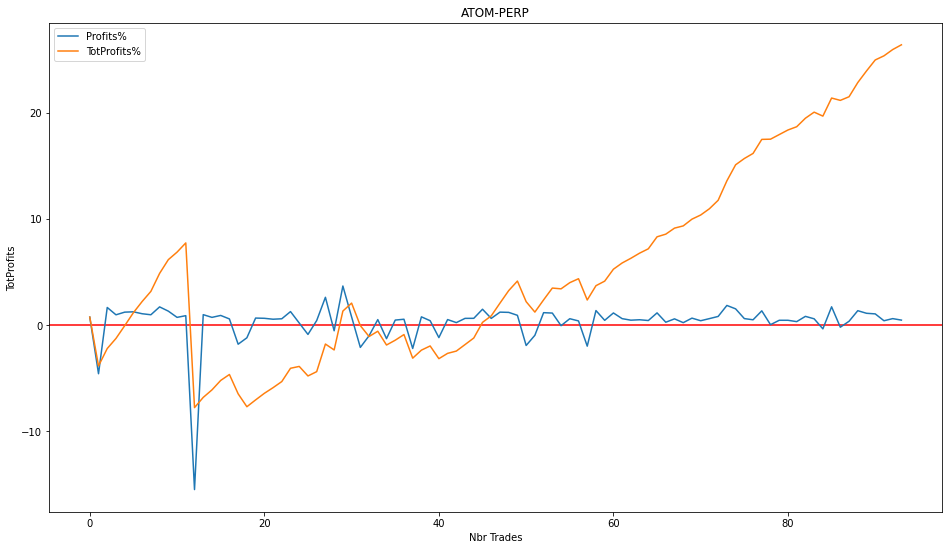

In [97]:
# Plotting Profits% & Cumulated Profits%
wr=0
for index, row in profitsdf[0].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[0]['Marché'][0],
        '\nFirst Trade: ', profitsdf[0]['Entry'][0],
        '\nLast Trade:  ', profitsdf[0]['Exit'][len(profitsdf[0].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[0].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[0].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[0]['Profits$'].sum() / len(profitsdf[0].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[0]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[0]['Profits%'].sum() / len(profitsdf[0].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[0]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[0]['ROI'].sum() / len(profitsdf[0].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[0]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[0]['Profits%'].plot(figsize=(16, 9), title=profitsdf[0]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[0]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[0]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[0]['Profits%'], color='#00b894')

REN-PERP 
First Trade:  2022-08-26 06:00:31.812421+00:00 
Last Trade:   2022-09-09 16:03:24.494336+00:00 
Nb of Trades: 31 
WinRate:      77.42 % 
$~/Trade:     0.7796 $ 
Total$:       24.1675 $ 
%~/Trade:     0.25 % 
Total%:       7.77 % 
ROI~/Trade:   0.25 % 
TotalROI:     7.63 %



<AxesSubplot:title={'center':'REN-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

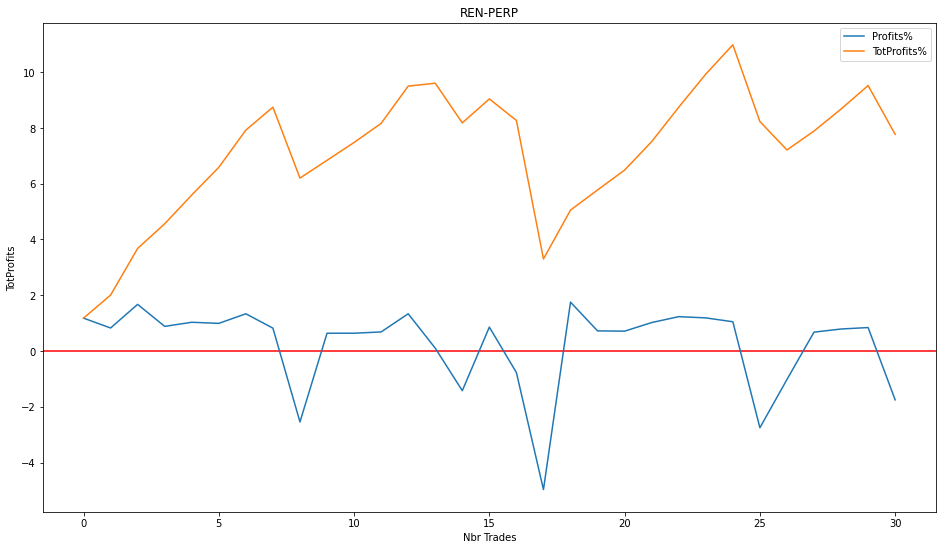

In [98]:
wr=0
for index, row in profitsdf[1].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[1]['Marché'][0],
        '\nFirst Trade: ', profitsdf[1]['Entry'][0],
        '\nLast Trade:  ', profitsdf[1]['Exit'][len(profitsdf[1].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[1].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[1].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[1]['Profits$'].sum() / len(profitsdf[1].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[1]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[1]['Profits%'].sum() / len(profitsdf[1].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[1]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[1]['ROI'].sum() / len(profitsdf[1].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[1]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[1]['Profits%'].plot(figsize=(16, 9), title=profitsdf[1]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[1]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[1]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[1]['Profits%'], color='#00b894')

ADA-PERP 
First Trade:  2022-09-03 16:00:16.417563+00:00 
Last Trade:   2022-09-09 16:03:12.454708+00:00 
Nb of Trades: 28 
WinRate:      82.14 % 
$~/Trade:     -0.5408 $ 
Total$:       -15.1429 $ 
%~/Trade:     0.37 % 
Total%:       10.47 % 
ROI~/Trade:   0.37 % 
TotalROI:     10.46 %



<AxesSubplot:title={'center':'ADA-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

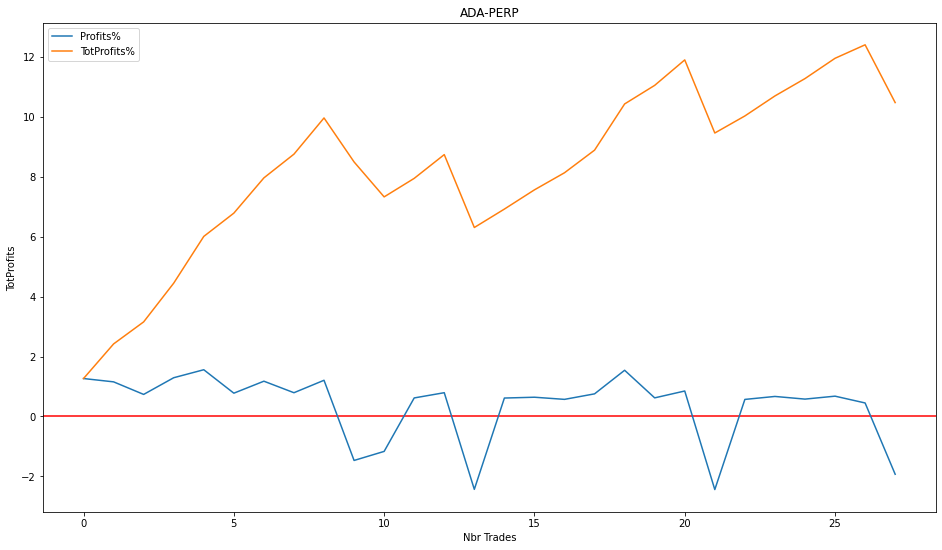

In [99]:
wr=0
for index, row in profitsdf[2].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[2]['Marché'][0],
        '\nFirst Trade: ', profitsdf[2]['Entry'][0],
        '\nLast Trade:  ', profitsdf[2]['Exit'][len(profitsdf[2].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[2].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[2].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[2]['Profits$'].sum() / len(profitsdf[2].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[2]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[2]['Profits%'].sum() / len(profitsdf[2].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[2]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[2]['ROI'].sum() / len(profitsdf[2].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[2]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[2]['Profits%'].plot(figsize=(16, 9), title=profitsdf[2]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[2]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[2]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[2]['Profits%'], color='#00b894')

LINK-PERP 
First Trade:  2022-08-19 07:00:25.647694+00:00 
Last Trade:   2022-09-09 16:03:12.400405+00:00 
Nb of Trades: 58 
WinRate:      81.03 % 
$~/Trade:     -0.0374 $ 
Total$:       -2.1691 $ 
%~/Trade:     0.33 % 
Total%:       18.99 % 
ROI~/Trade:   0.33 % 
TotalROI:     18.85 %



<AxesSubplot:title={'center':'LINK-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

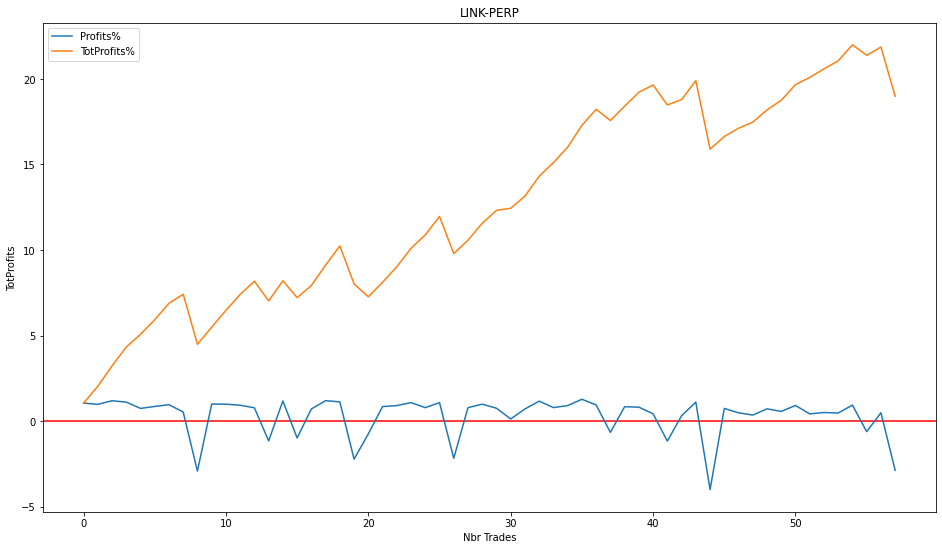

In [100]:
wr=0
for index, row in profitsdf[3].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[3]['Marché'][0],
        '\nFirst Trade: ', profitsdf[3]['Entry'][0],
        '\nLast Trade:  ', profitsdf[3]['Exit'][len(profitsdf[3].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[3].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[3].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[3]['Profits$'].sum() / len(profitsdf[3].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[3]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[3]['Profits%'].sum() / len(profitsdf[3].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[3]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[3]['ROI'].sum() / len(profitsdf[3].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[3]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[3]['Profits%'].plot(figsize=(16, 9), title=profitsdf[3]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[3]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[3]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[3]['Profits%'], color='#00b894')

ATOM-PERP 
First Trade:  2022-08-16 00:00:12.472028+00:00 
Last Trade:   2022-09-09 16:02:29.408799+00:00 
Nb of Trades: 94 
WinRate:      81.91 % 
$~/Trade:     0.5531 $ 
Total$:       51.9948 $ 
%~/Trade:     0.28 % 
Total%:       26.4 % 
ROI~/Trade:   0.28 % 
TotalROI:     26.35 %



<AxesSubplot:title={'center':'ATOM-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

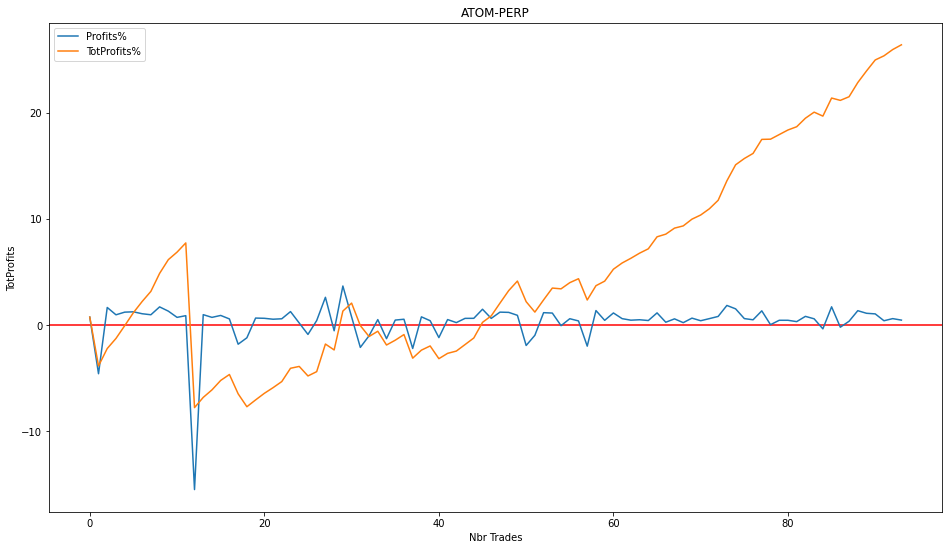

In [101]:
wr=0
for index, row in profitsdf[4].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[4]['Marché'][0],
        '\nFirst Trade: ', profitsdf[4]['Entry'][0],
        '\nLast Trade:  ', profitsdf[4]['Exit'][len(profitsdf[4].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[4].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[4].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[4]['Profits$'].sum() / len(profitsdf[4].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[4]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[4]['Profits%'].sum() / len(profitsdf[4].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[4]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[4]['ROI'].sum() / len(profitsdf[4].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[4]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[4]['Profits%'].plot(figsize=(16, 9), title=profitsdf[4]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[4]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[4]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[4]['Profits%'], color='#00b894')

TOMO-PERP 
First Trade:  2022-08-15 00:00:12.918240+00:00 
Last Trade:   2022-09-07 13:06:35.543093+00:00 
Nb of Trades: 21 
WinRate:      80.95 % 
$~/Trade:     0.1554 $ 
Total$:       3.2624 $ 
%~/Trade:     0.18 % 
Total%:       3.78 % 
ROI~/Trade:   0.18 % 
TotalROI:     3.75 %



<AxesSubplot:title={'center':'TOMO-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

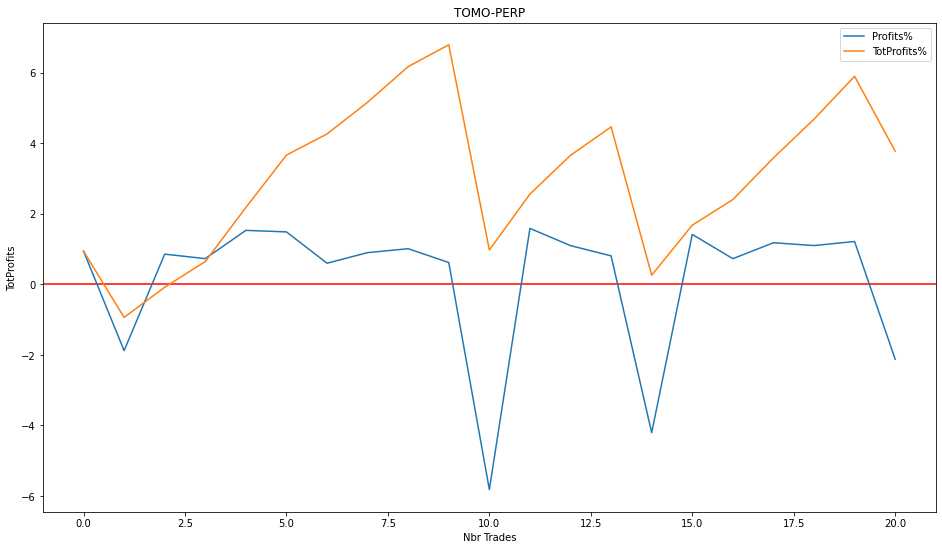

In [102]:
wr=0
for index, row in profitsdf[5].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[5]['Marché'][0],
        '\nFirst Trade: ', profitsdf[5]['Entry'][0],
        '\nLast Trade:  ', profitsdf[5]['Exit'][len(profitsdf[5].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[5].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[5].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[5]['Profits$'].sum() / len(profitsdf[5].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[5]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[5]['Profits%'].sum() / len(profitsdf[5].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[5]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[5]['ROI'].sum() / len(profitsdf[5].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[5]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[5]['Profits%'].plot(figsize=(16, 9), title=profitsdf[5]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[5]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[5]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[5]['Profits%'], color='#00b894')

NEAR-PERP 
First Trade:  2022-08-19 00:30:12.629584+00:00 
Last Trade:   2022-09-09 14:13:48.288268+00:00 
Nb of Trades: 114 
WinRate:      74.56 % 
$~/Trade:     0.4933 $ 
Total$:       56.2375 $ 
%~/Trade:     0.2 % 
Total%:       22.4 % 
ROI~/Trade:   0.19 % 
TotalROI:     22.22 %



<AxesSubplot:title={'center':'NEAR-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

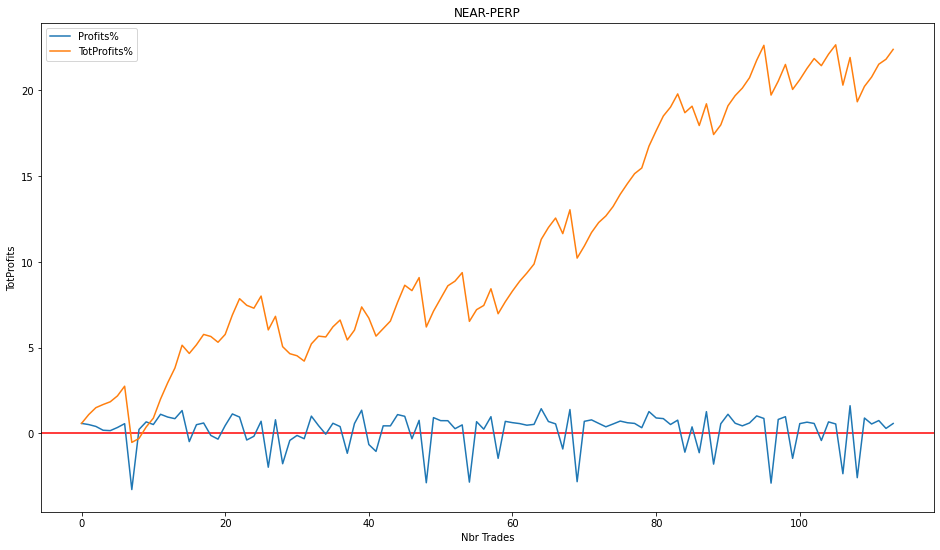

In [103]:
wr=0
for index, row in profitsdf[6].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[6]['Marché'][0],
        '\nFirst Trade: ', profitsdf[6]['Entry'][0],
        '\nLast Trade:  ', profitsdf[6]['Exit'][len(profitsdf[6].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[6].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[6].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[6]['Profits$'].sum() / len(profitsdf[6].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[6]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[6]['Profits%'].sum() / len(profitsdf[6].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[6]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[6]['ROI'].sum() / len(profitsdf[6].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[6]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[6]['Profits%'].plot(figsize=(16, 9), title=profitsdf[6]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[6]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[6]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[6]['Profits%'], color='#00b894')

CRV-PERP 
First Trade:  2022-08-22 19:30:19.855821+00:00 
Last Trade:   2022-09-09 14:12:31.043382+00:00 
Nb of Trades: 53 
WinRate:      66.04 % 
$~/Trade:     0.5403 $ 
Total$:       28.6356 $ 
%~/Trade:     0.27 % 
Total%:       14.37 % 
ROI~/Trade:   0.27 % 
TotalROI:     14.35 %



<AxesSubplot:title={'center':'CRV-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

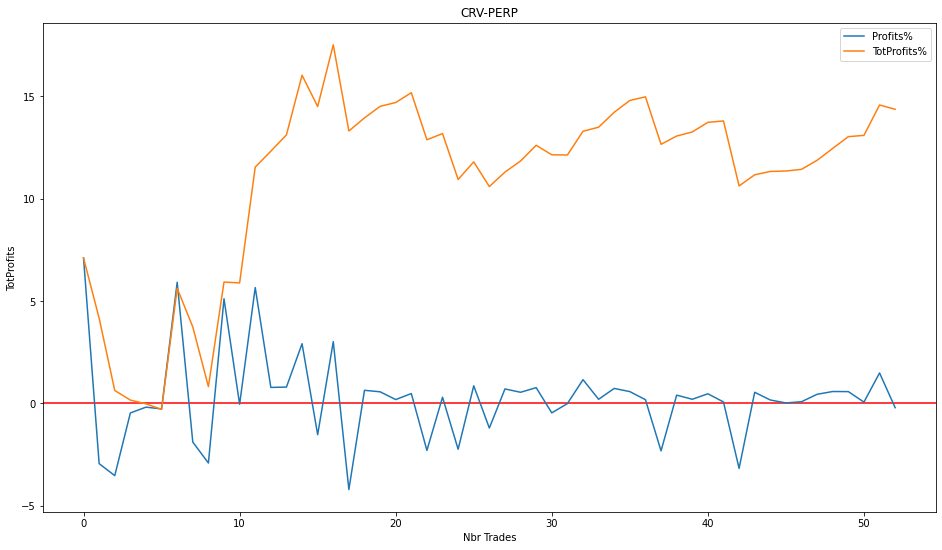

In [104]:
wr=0
for index, row in profitsdf[7].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[7]['Marché'][0],
        '\nFirst Trade: ', profitsdf[7]['Entry'][0],
        '\nLast Trade:  ', profitsdf[7]['Exit'][len(profitsdf[7].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[7].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[7].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[7]['Profits$'].sum() / len(profitsdf[7].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[7]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[7]['Profits%'].sum() / len(profitsdf[7].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[7]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[7]['ROI'].sum() / len(profitsdf[7].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[7]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[7]['Profits%'].plot(figsize=(16, 9), title=profitsdf[7]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[7]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[7]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[7]['Profits%'], color='#00b894')

CHZ-PERP 
First Trade:  2022-08-14 15:15:06.608185+00:00 
Last Trade:   2022-09-09 13:13:04.912111+00:00 
Nb of Trades: 247 
WinRate:      79.35 % 
$~/Trade:     -0.1039 $ 
Total$:       -25.6532 $ 
%~/Trade:     0.09 % 
Total%:       22.92 % 
ROI~/Trade:   0.09 % 
TotalROI:     22.5 %



<AxesSubplot:title={'center':'CHZ-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

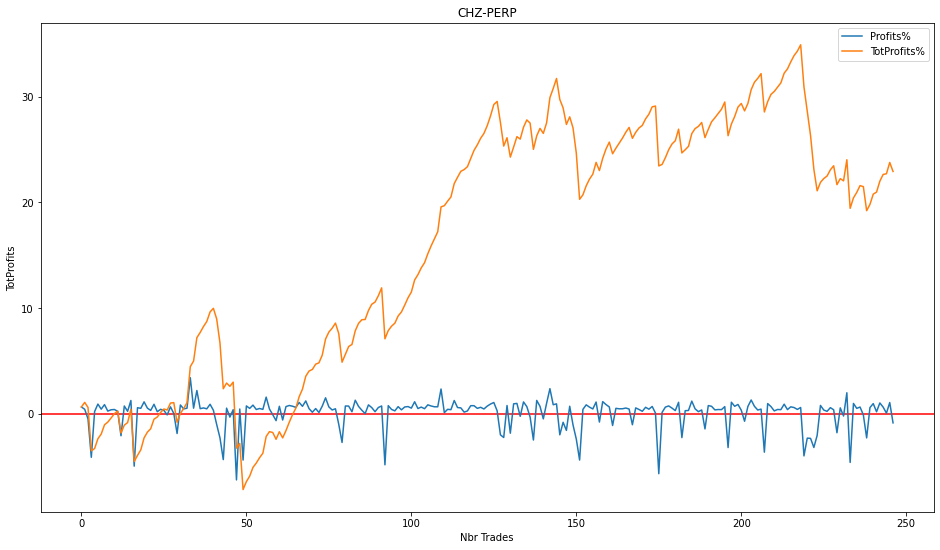

In [105]:
wr=0
for index, row in profitsdf[8].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[8]['Marché'][0],
        '\nFirst Trade: ', profitsdf[8]['Entry'][0],
        '\nLast Trade:  ', profitsdf[8]['Exit'][len(profitsdf[8].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[8].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[8].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[8]['Profits$'].sum() / len(profitsdf[8].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[8]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[8]['Profits%'].sum() / len(profitsdf[8].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[8]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[8]['ROI'].sum() / len(profitsdf[8].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[8]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[8]['Profits%'].plot(figsize=(16, 9), title=profitsdf[8]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[8]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[8]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[8]['Profits%'], color='#00b894')

BAL-PERP 
First Trade:  2022-08-26 19:00:14.400544+00:00 
Last Trade:   2022-09-09 13:05:10.614427+00:00 
Nb of Trades: 46 
WinRate:      73.91 % 
$~/Trade:     -0.1038 $ 
Total$:       -4.7737 $ 
%~/Trade:     0.37 % 
Total%:       16.81 % 
ROI~/Trade:   0.36 % 
TotalROI:     16.64 %



<AxesSubplot:title={'center':'BAL-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

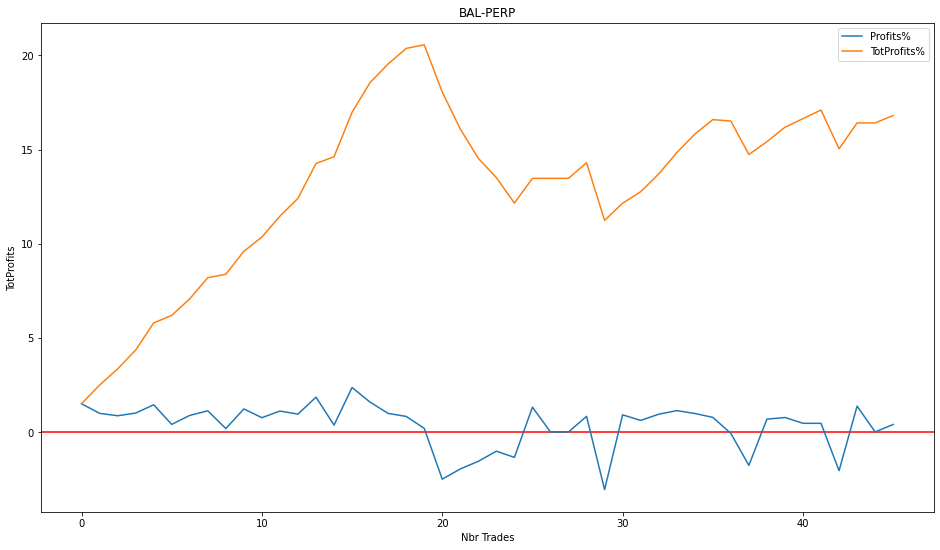

In [106]:
wr=0
for index, row in profitsdf[9].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[9]['Marché'][0],
        '\nFirst Trade: ', profitsdf[9]['Entry'][0],
        '\nLast Trade:  ', profitsdf[9]['Exit'][len(profitsdf[9].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[9].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[9].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[9]['Profits$'].sum() / len(profitsdf[9].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[9]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[9]['Profits%'].sum() / len(profitsdf[9].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[9]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[9]['ROI'].sum() / len(profitsdf[9].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[9]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[9]['Profits%'].plot(figsize=(16, 9), title=profitsdf[9]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[9]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[9]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[9]['Profits%'], color='#00b894')

SECO-PERP 
First Trade:  2022-08-25 06:00:16.067440+00:00 
Last Trade:   2022-08-20 19:16:32.084700+00:00 
Nb of Trades: 78 
WinRate:      12.82 % 
$~/Trade:     0.7947 $ 
Total$:       61.9854 $ 
%~/Trade:     -0.44 % 
Total%:       -34.05 % 
ROI~/Trade:   -0.52 % 
TotalROI:     -40.64 %



<AxesSubplot:title={'center':'SECO-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

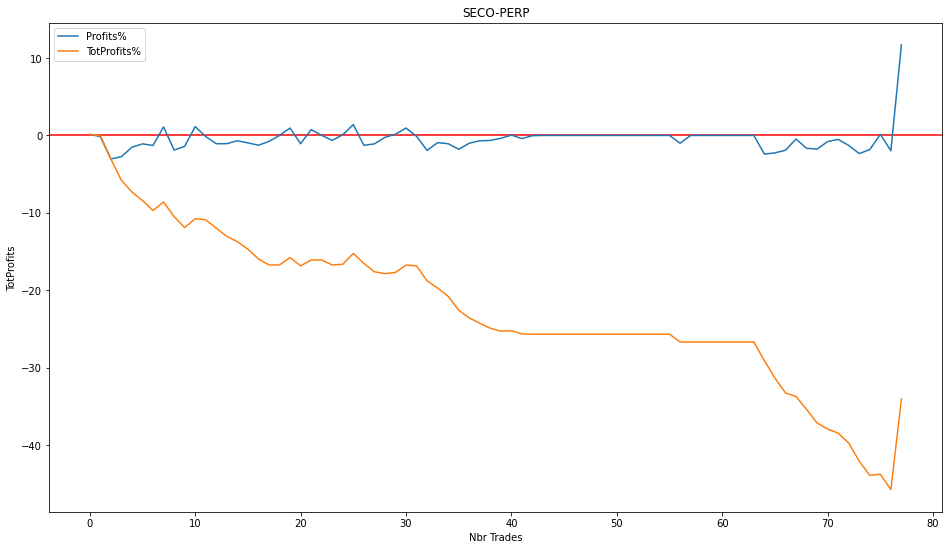

In [107]:
wr=0
for index, row in profitsdf[10].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[10]['Marché'][0],
        '\nFirst Trade: ', profitsdf[10]['Entry'][0],
        '\nLast Trade:  ', profitsdf[10]['Exit'][len(profitsdf[10].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[10].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[10].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[10]['Profits$'].sum() / len(profitsdf[10].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[10]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[10]['Profits%'].sum() / len(profitsdf[10].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[10]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[10]['ROI'].sum() / len(profitsdf[10].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[10]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[10]['Profits%'].plot(figsize=(16, 9), title=profitsdf[10]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[10]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[10]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[10]['Profits%'], color='#00b894')

RUNE-PERP 
First Trade:  2022-08-26 14:30:36.332539+00:00 
Last Trade:   2022-09-08 13:15:53.118455+00:00 
Nb of Trades: 74 
WinRate:      52.7 % 
$~/Trade:     1.6319 $ 
Total$:       120.7601 $ 
%~/Trade:     0.28 % 
Total%:       20.63 % 
ROI~/Trade:   0.27 % 
TotalROI:     20.05 %



<AxesSubplot:title={'center':'RUNE-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

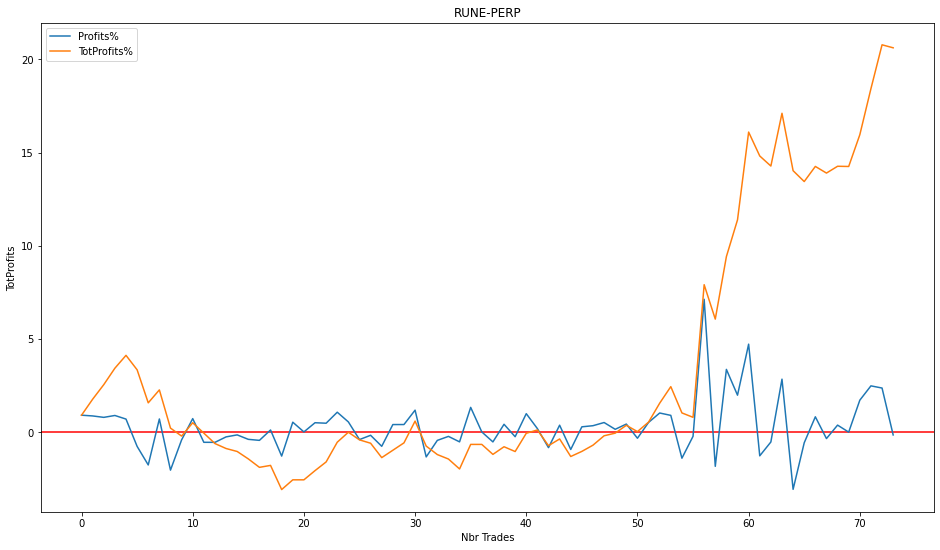

In [108]:
wr=0
for index, row in profitsdf[11].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[11]['Marché'][0],
        '\nFirst Trade: ', profitsdf[11]['Entry'][0],
        '\nLast Trade:  ', profitsdf[11]['Exit'][len(profitsdf[11].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[11].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[11].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[11]['Profits$'].sum() / len(profitsdf[11].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[11]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[11]['Profits%'].sum() / len(profitsdf[11].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[11]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[11]['ROI'].sum() / len(profitsdf[11].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[11]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[11]['Profits%'].plot(figsize=(16, 9), title=profitsdf[11]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[11]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[11]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[11]['Profits%'], color='#00b894')

FIL-PERP 
First Trade:  2022-08-17 04:00:09.502547+00:00 
Last Trade:   2022-09-07 02:25:37.861873+00:00 
Nb of Trades: 16 
WinRate:      75.0 % 
$~/Trade:     -0.6948 $ 
Total$:       -11.117 $ 
%~/Trade:     0.6 % 
Total%:       9.58 % 
ROI~/Trade:   0.58 % 
TotalROI:     9.32 %



<AxesSubplot:title={'center':'FIL-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

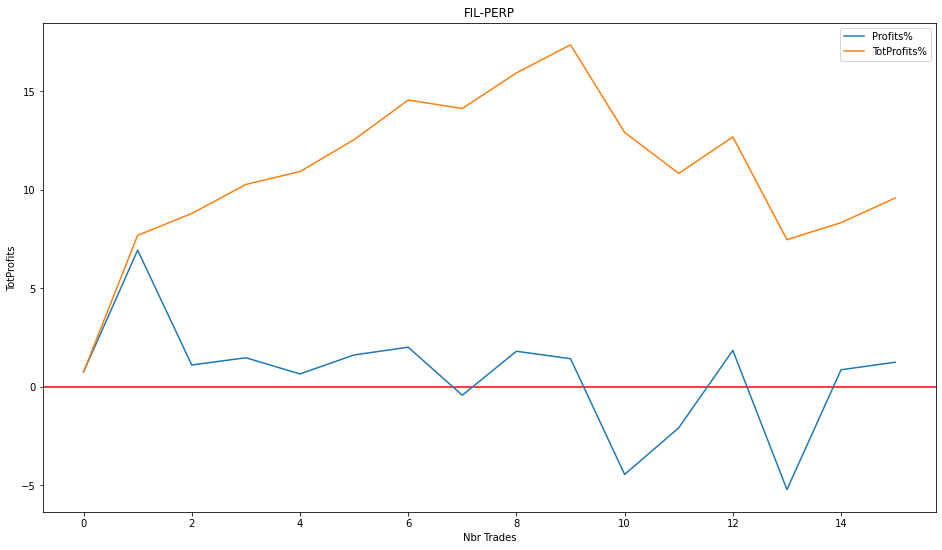

In [109]:
wr=0
for index, row in profitsdf[12].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[12]['Marché'][0],
        '\nFirst Trade: ', profitsdf[12]['Entry'][0],
        '\nLast Trade:  ', profitsdf[12]['Exit'][len(profitsdf[12].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[12].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[12].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[12]['Profits$'].sum() / len(profitsdf[12].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[12]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[12]['Profits%'].sum() / len(profitsdf[12].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[12]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[12]['ROI'].sum() / len(profitsdf[12].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[12]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[12]['Profits%'].plot(figsize=(16, 9), title=profitsdf[12]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[12]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[12]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[12]['Profits%'], color='#00b894')

MATIC-PERP 
First Trade:  2022-08-26 11:00:14.650033+00:00 
Last Trade:   2022-08-30 15:00:25.359138+00:00 
Nb of Trades: 8 
WinRate:      37.5 % 
$~/Trade:     -7.9286 $ 
Total$:       -63.4286 $ 
%~/Trade:     -1.54 % 
Total%:       -12.34 % 
ROI~/Trade:   -1.57 % 
TotalROI:     -12.55 %



<AxesSubplot:title={'center':'MATIC-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

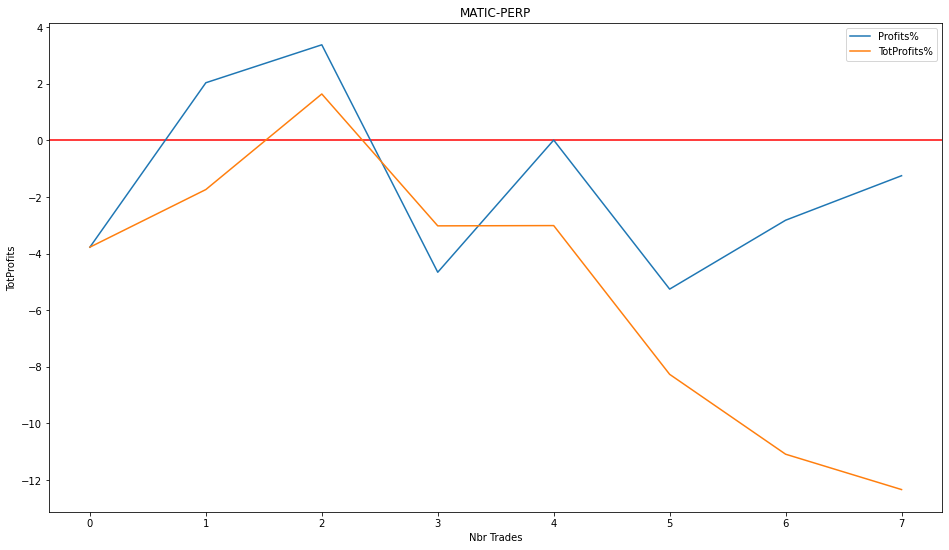

In [110]:
wr=0
for index, row in profitsdf[13].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[13]['Marché'][0],
        '\nFirst Trade: ', profitsdf[13]['Entry'][0],
        '\nLast Trade:  ', profitsdf[13]['Exit'][len(profitsdf[13].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[13].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[13].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[13]['Profits$'].sum() / len(profitsdf[13].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[13]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[13]['Profits%'].sum() / len(profitsdf[13].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[13]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[13]['ROI'].sum() / len(profitsdf[13].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[13]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[13]['Profits%'].plot(figsize=(16, 9), title=profitsdf[13]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[13]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[13]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[13]['Profits%'], color='#00b894')

DOT-PERP 
First Trade:  2022-08-20 00:00:15.780408+00:00 
Last Trade:   2022-09-09 12:41:40.552763+00:00 
Nb of Trades: 17 
WinRate:      58.82 % 
$~/Trade:     -0.0064 $ 
Total$:       -0.1091 $ 
%~/Trade:     -0.06 % 
Total%:       -0.96 % 
ROI~/Trade:   -0.06 % 
TotalROI:     -0.98 %



<AxesSubplot:title={'center':'DOT-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

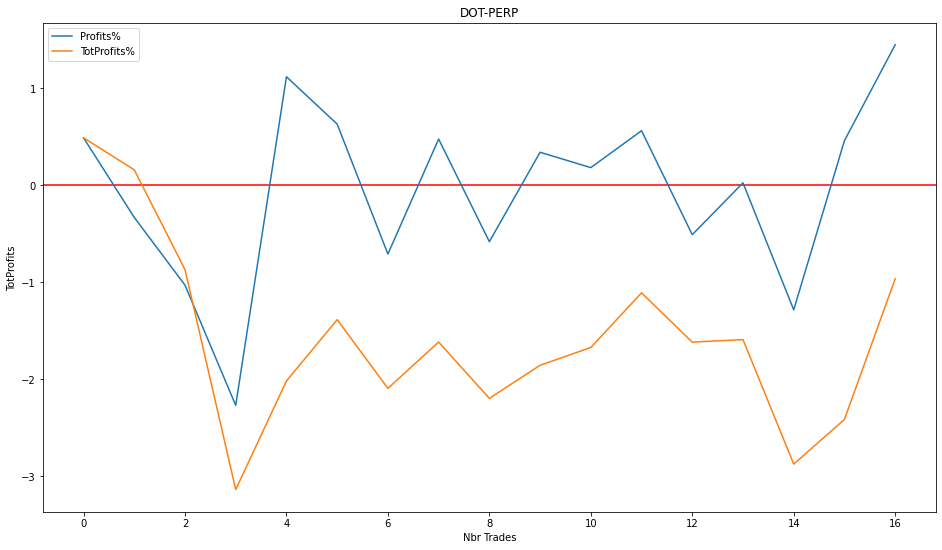

In [111]:
wr=0
for index, row in profitsdf[14].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[14]['Marché'][0],
        '\nFirst Trade: ', profitsdf[14]['Entry'][0],
        '\nLast Trade:  ', profitsdf[14]['Exit'][len(profitsdf[14].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[14].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[14].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[14]['Profits$'].sum() / len(profitsdf[14].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[14]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[14]['Profits%'].sum() / len(profitsdf[14].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[14]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[14]['ROI'].sum() / len(profitsdf[14].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[14]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[14]['Profits%'].plot(figsize=(16, 9), title=profitsdf[14]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[14]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[14]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[14]['Profits%'], color='#00b894')

AXS-PERP 
First Trade:  2022-08-19 01:30:13.196992+00:00 
Last Trade:   2022-09-09 12:03:09.178331+00:00 
Nb of Trades: 61 
WinRate:      62.3 % 
$~/Trade:     -0.3115 $ 
Total$:       -19.0034 $ 
%~/Trade:     0.13 % 
Total%:       7.95 % 
ROI~/Trade:   0.13 % 
TotalROI:     7.9 %



<AxesSubplot:title={'center':'AXS-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

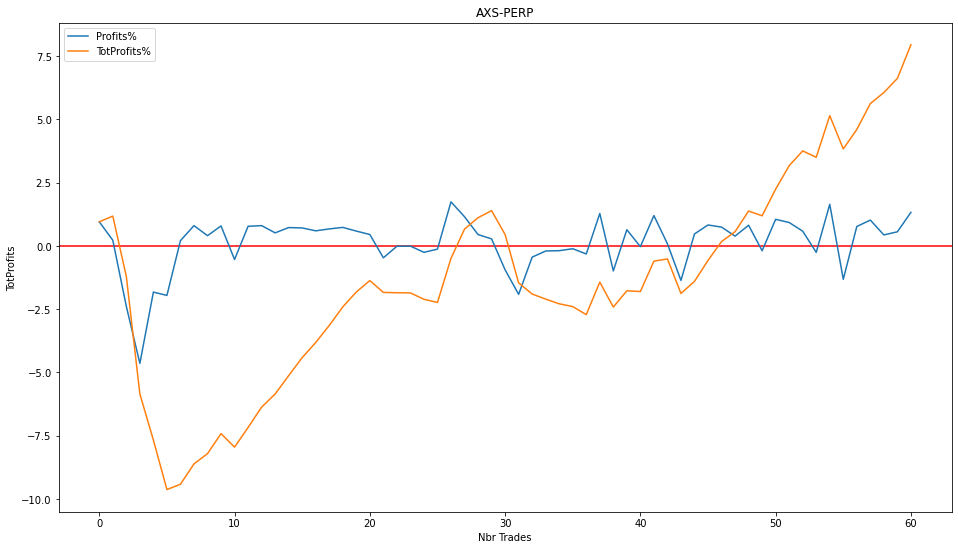

In [112]:
wr=0
for index, row in profitsdf[15].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[15]['Marché'][0],
        '\nFirst Trade: ', profitsdf[15]['Entry'][0],
        '\nLast Trade:  ', profitsdf[15]['Exit'][len(profitsdf[15].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[15].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[15].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[15]['Profits$'].sum() / len(profitsdf[15].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[15]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[15]['Profits%'].sum() / len(profitsdf[15].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[15]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[15]['ROI'].sum() / len(profitsdf[15].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[15]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[15]['Profits%'].plot(figsize=(16, 9), title=profitsdf[15]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[15]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[15]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[15]['Profits%'], color='#00b894')

ASD-PERP 
First Trade:  2022-08-22 13:00:12.856714+00:00 
Last Trade:   2022-09-06 17:00:01.289233+00:00 
Nb of Trades: 4 
WinRate:      75.0 % 
$~/Trade:     5.2917 $ 
Total$:       21.1669 $ 
%~/Trade:     2.81 % 
Total%:       11.23 % 
ROI~/Trade:   2.55 % 
TotalROI:     10.22 %



<AxesSubplot:title={'center':'ASD-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

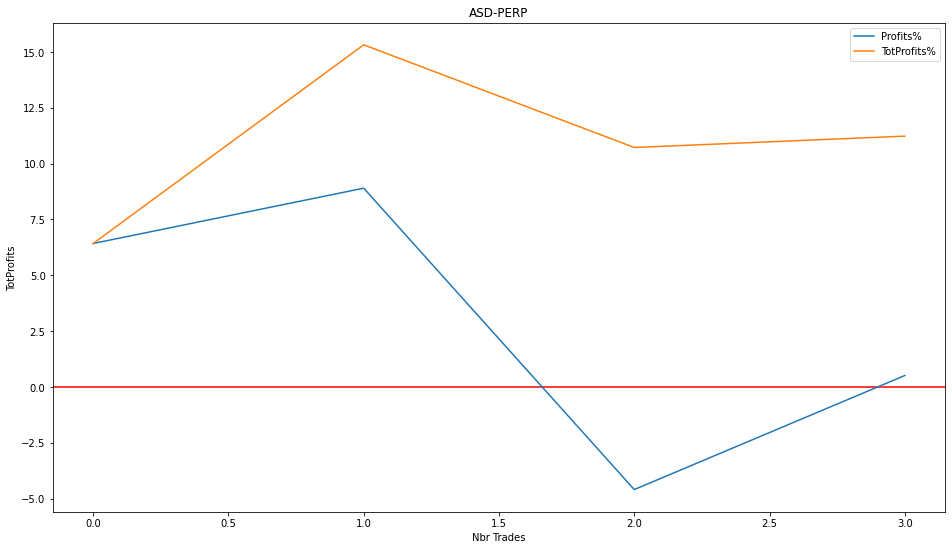

In [113]:
wr=0
for index, row in profitsdf[16].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[16]['Marché'][0],
        '\nFirst Trade: ', profitsdf[16]['Entry'][0],
        '\nLast Trade:  ', profitsdf[16]['Exit'][len(profitsdf[16].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[16].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[16].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[16]['Profits$'].sum() / len(profitsdf[16].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[16]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[16]['Profits%'].sum() / len(profitsdf[16].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[16]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[16]['ROI'].sum() / len(profitsdf[16].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[16]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[16]['Profits%'].plot(figsize=(16, 9), title=profitsdf[16]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[16]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[16]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[16]['Profits%'], color='#00b894')

AAVE-PERP 
First Trade:  2022-09-06 18:01:04.765538+00:00 
Last Trade:   2022-09-08 20:01:10.440338+00:00 
Nb of Trades: 13 
WinRate:      69.23 % 
$~/Trade:     0.0271 $ 
Total$:       0.3523 $ 
%~/Trade:     0.17 % 
Total%:       2.25 % 
ROI~/Trade:   0.17 % 
TotalROI:     2.2 %



<AxesSubplot:title={'center':'AAVE-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

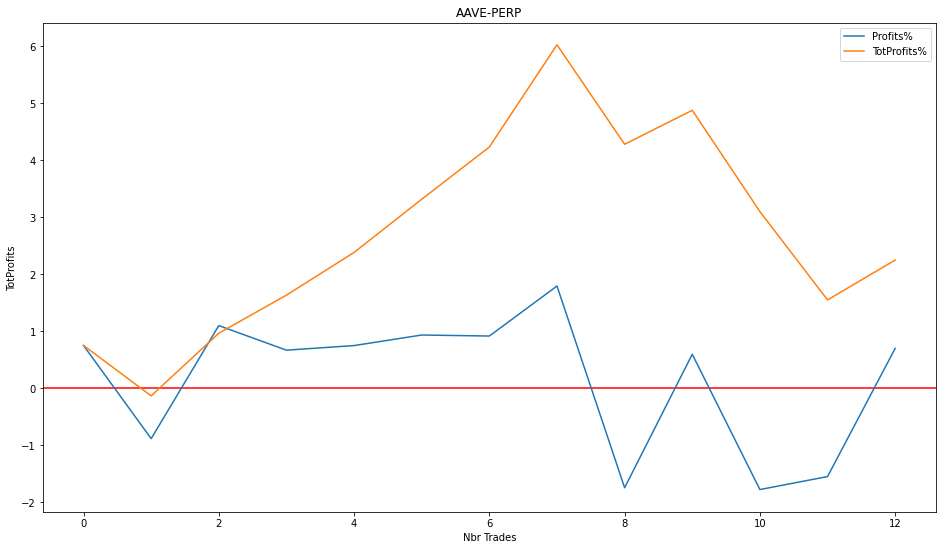

In [114]:
wr=0
for index, row in profitsdf[17].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[17]['Marché'][0],
        '\nFirst Trade: ', profitsdf[17]['Entry'][0],
        '\nLast Trade:  ', profitsdf[17]['Exit'][len(profitsdf[17].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[17].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[17].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[17]['Profits$'].sum() / len(profitsdf[17].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[17]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[17]['Profits%'].sum() / len(profitsdf[17].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[17]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[17]['ROI'].sum() / len(profitsdf[17].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[17]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[17]['Profits%'].plot(figsize=(16, 9), title=profitsdf[17]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[17]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[17]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[17]['Profits%'], color='#00b894')

1INCH-PERP 
First Trade:  2022-09-02 09:00:11.510435+00:00 
Last Trade:   2022-09-07 14:00:18.430741+00:00 
Nb of Trades: 11 
WinRate:      72.73 % 
$~/Trade:     0.0207 $ 
Total$:       0.2273 $ 
%~/Trade:     0.29 % 
Total%:       3.18 % 
ROI~/Trade:   0.29 % 
TotalROI:     3.18 %



<AxesSubplot:title={'center':'1INCH-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

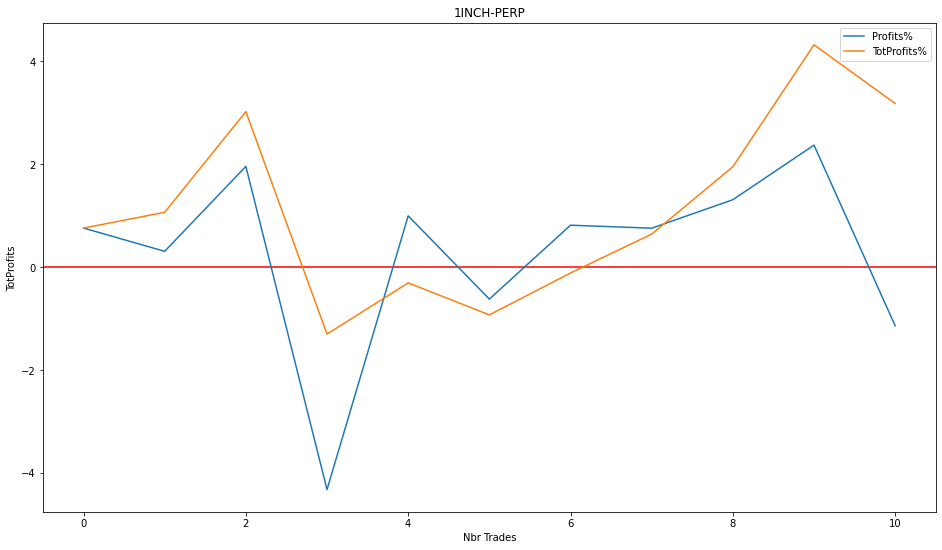

In [115]:
wr=0
for index, row in profitsdf[18].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[18]['Marché'][0],
        '\nFirst Trade: ', profitsdf[18]['Entry'][0],
        '\nLast Trade:  ', profitsdf[18]['Exit'][len(profitsdf[18].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[18].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[18].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[18]['Profits$'].sum() / len(profitsdf[18].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[18]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[18]['Profits%'].sum() / len(profitsdf[18].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[18]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[18]['ROI'].sum() / len(profitsdf[18].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[18]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[18]['Profits%'].plot(figsize=(16, 9), title=profitsdf[18]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[18]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[18]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[18]['Profits%'], color='#00b894')

COMP-PERP 
First Trade:  2022-09-06 19:00:43.161193+00:00 
Last Trade:   2022-09-07 14:00:15.283800+00:00 
Nb of Trades: 11 
WinRate:      45.45 % 
$~/Trade:     0.0196 $ 
Total$:       0.2159 $ 
%~/Trade:     0.17 % 
Total%:       1.82 % 
ROI~/Trade:   0.17 % 
TotalROI:     1.82 %



<AxesSubplot:title={'center':'COMP-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

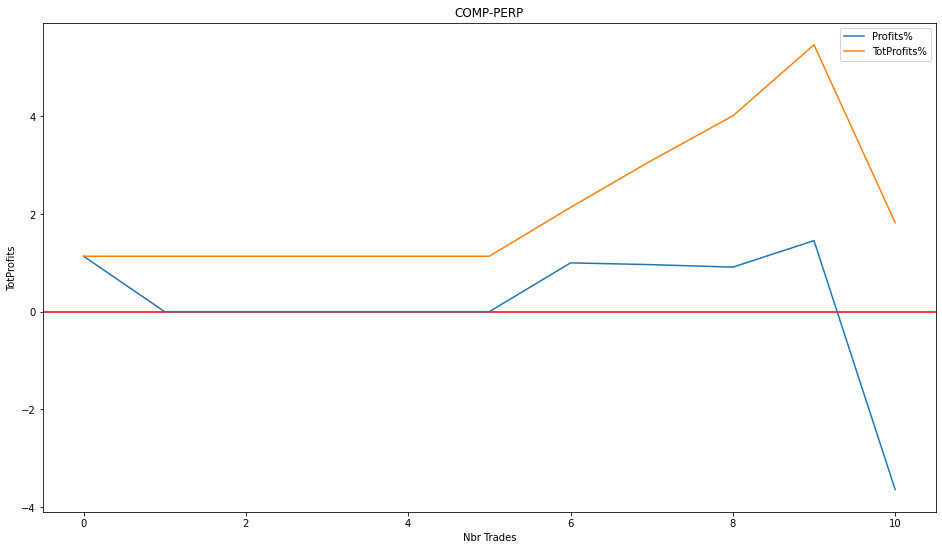

In [116]:
wr=0
for index, row in profitsdf[19].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[19]['Marché'][0],
        '\nFirst Trade: ', profitsdf[19]['Entry'][0],
        '\nLast Trade:  ', profitsdf[19]['Exit'][len(profitsdf[19].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[19].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[19].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[19]['Profits$'].sum() / len(profitsdf[19].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[19]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[19]['Profits%'].sum() / len(profitsdf[19].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[19]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[19]['ROI'].sum() / len(profitsdf[19].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[19]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[19]['Profits%'].plot(figsize=(16, 9), title=profitsdf[19]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[19]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[19]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[19]['Profits%'], color='#00b894')

SXP-PERP 
First Trade:  2022-09-06 18:00:57.564837+00:00 
Last Trade:   2022-09-07 14:00:14.577502+00:00 
Nb of Trades: 6 
WinRate:      66.67 % 
$~/Trade:     0.0065 $ 
Total$:       0.0389 $ 
%~/Trade:     0.09 % 
Total%:       0.53 % 
ROI~/Trade:   0.09 % 
TotalROI:     0.53 %



<AxesSubplot:title={'center':'SXP-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

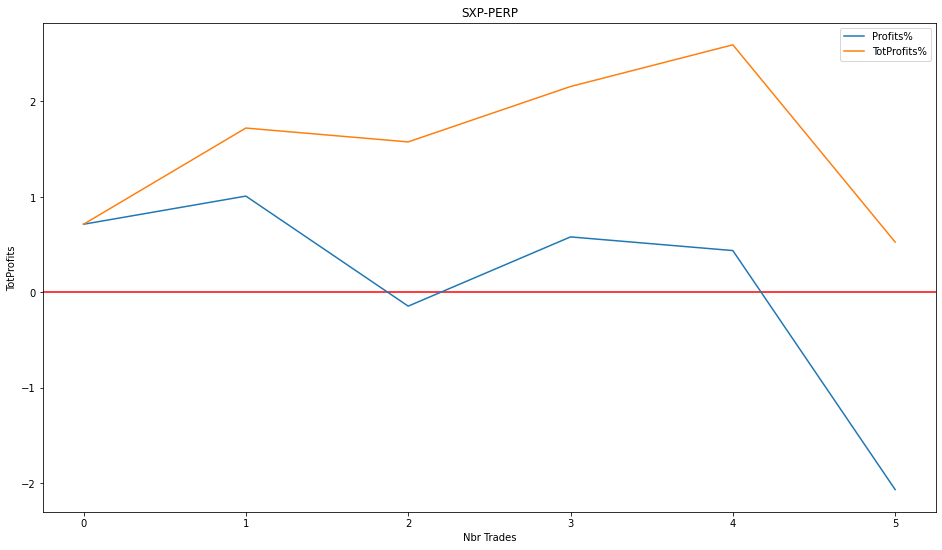

In [117]:
wr=0
for index, row in profitsdf[20].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[20]['Marché'][0],
        '\nFirst Trade: ', profitsdf[20]['Entry'][0],
        '\nLast Trade:  ', profitsdf[20]['Exit'][len(profitsdf[20].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[20].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[20].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[20]['Profits$'].sum() / len(profitsdf[20].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[20]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[20]['Profits%'].sum() / len(profitsdf[20].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[20]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[20]['ROI'].sum() / len(profitsdf[20].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[20]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[20]['Profits%'].plot(figsize=(16, 9), title=profitsdf[20]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[20]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[20]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[20]['Profits%'], color='#00b894')

In [118]:
wr=0
for index, row in profitsdf[21].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[21]['Marché'][0],
        '\nFirst Trade: ', profitsdf[21]['Entry'][0],
        '\nLast Trade:  ', profitsdf[21]['Exit'][len(profitsdf[21].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[21].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[21].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[21]['Profits$'].sum() / len(profitsdf[21].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[21]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[21]['Profits%'].sum() / len(profitsdf[21].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[21]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[21]['ROI'].sum() / len(profitsdf[21].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[21]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[21]['Profits%'].plot(figsize=(16, 9), title=profitsdf[21]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[21]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[21]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[21]['Profits%'], color='#00b894')

IndexError: list index out of range

In [ ]:
wr=0
for index, row in profitsdf[22].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[22]['Marché'][0],
        '\nFirst Trade: ', profitsdf[22]['Entry'][0],
        '\nLast Trade:  ', profitsdf[22]['Exit'][len(profitsdf[22].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[22].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[22].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[22]['Profits$'].sum() / len(profitsdf[22].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[22]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[22]['Profits%'].sum() / len(profitsdf[22].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[22]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[22]['ROI'].sum() / len(profitsdf[22].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[22]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[22]['Profits%'].plot(figsize=(16, 9), title=profitsdf[22]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[22]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[22]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[22]['Profits%'], color='#00b894')

IndexError: list index out of range

WAVES-PERP 
First Trade:  2022-08-23 16:00:37.837111+00:00 
Last Trade:   2022-09-07 05:30:08.471487+00:00 
Nb of Trades: 55 
WinRate:      47.27 % 
$~/Trade:     0.3794 $ 
Total$:       20.8655 $ 
%~/Trade:     0.04 % 
Total%:       2.33 % 
ROI~/Trade:   0.04 % 
TotalROI:     2.13 %



<AxesSubplot:title={'center':'WAVES-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

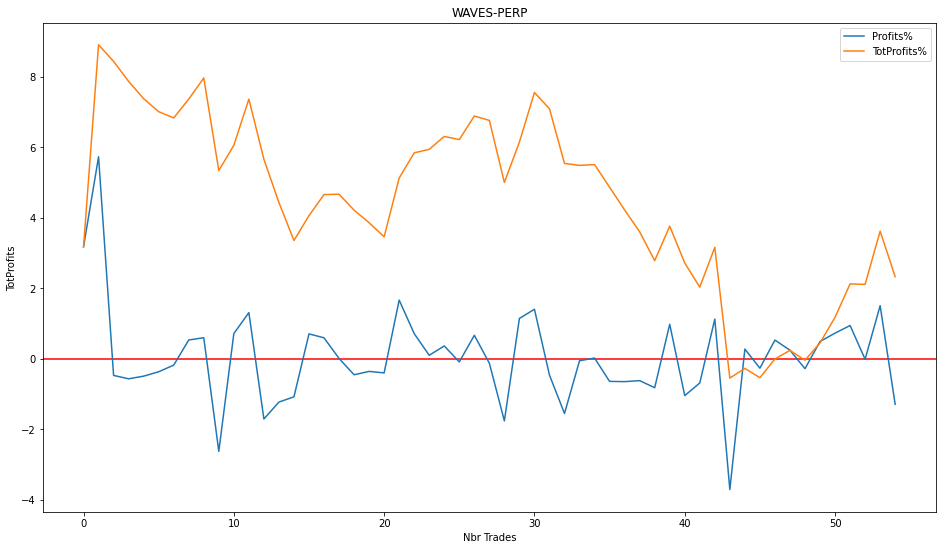

In [ ]:
wr=0
for index, row in profitsdf[23].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[23]['Marché'][0],
        '\nFirst Trade: ', profitsdf[23]['Entry'][0],
        '\nLast Trade:  ', profitsdf[23]['Exit'][len(profitsdf[23].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[23].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[23].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[23]['Profits$'].sum() / len(profitsdf[23].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[23]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[23]['Profits%'].sum() / len(profitsdf[23].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[23]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[23]['ROI'].sum() / len(profitsdf[23].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[23]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[23]['Profits%'].plot(figsize=(16, 9), title=profitsdf[23]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[23]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[23]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[23]['Profits%'], color='#00b894')

RON-PERP 
First Trade:  2022-08-23 01:00:10.279266+00:00 
Last Trade:   2022-08-30 10:46:01.165063+00:00 
Nb of Trades: 3 
WinRate:      100.0 % 
$~/Trade:     10.6905 $ 
Total$:       32.0715 $ 
%~/Trade:     4.2 % 
Total%:       12.61 % 
ROI~/Trade:   4.09 % 
TotalROI:     12.26 %



<AxesSubplot:title={'center':'RON-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

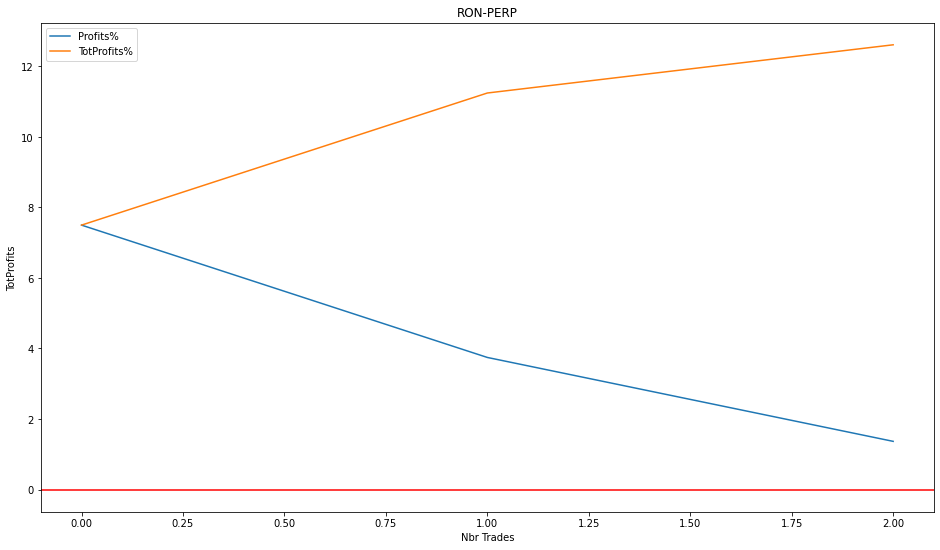

In [ ]:
wr=0
for index, row in profitsdf[24].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[24]['Marché'][0],
        '\nFirst Trade: ', profitsdf[24]['Entry'][0],
        '\nLast Trade:  ', profitsdf[24]['Exit'][len(profitsdf[24].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[24].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[24].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[24]['Profits$'].sum() / len(profitsdf[24].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[24]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[24]['Profits%'].sum() / len(profitsdf[24].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[24]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[24]['ROI'].sum() / len(profitsdf[24].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[24]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[24]['Profits%'].plot(figsize=(16, 9), title=profitsdf[24]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[24]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[24]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[24]['Profits%'], color='#00b894')

ASD-PERP 
First Trade:  2022-08-22 13:00:12.856714+00:00 
Last Trade:   2022-09-02 16:00:41.023880+00:00 
Nb of Trades: 3 
WinRate:      66.67 % 
$~/Trade:     6.958 $ 
Total$:       20.8739 $ 
%~/Trade:     3.57 % 
Total%:       10.72 % 
ROI~/Trade:   3.32 % 
TotalROI:     9.96 %



<AxesSubplot:title={'center':'ASD-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

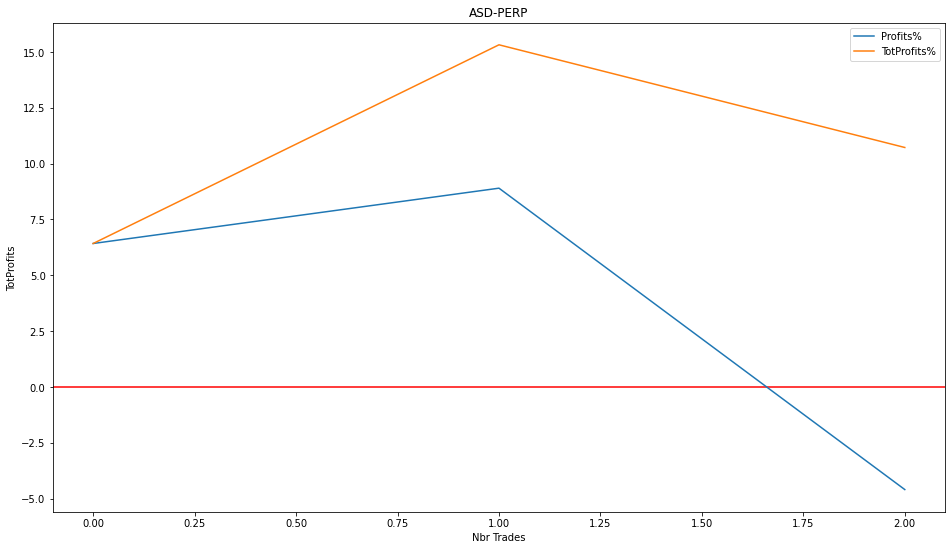

In [ ]:
wr=0
for index, row in profitsdf[25].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[25]['Marché'][0],
        '\nFirst Trade: ', profitsdf[25]['Entry'][0],
        '\nLast Trade:  ', profitsdf[25]['Exit'][len(profitsdf[25].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[25].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[25].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[25]['Profits$'].sum() / len(profitsdf[25].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[25]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[25]['Profits%'].sum() / len(profitsdf[25].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[25]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[25]['ROI'].sum() / len(profitsdf[25].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[25]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[25]['Profits%'].plot(figsize=(16, 9), title=profitsdf[25]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[25]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[25]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[25]['Profits%'], color='#00b894')

In [ ]:
wr=0
for index, row in profitsdf[26].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[26]['Marché'][0],
        '\nFirst Trade: ', profitsdf[26]['Entry'][0],
        '\nLast Trade:  ', profitsdf[26]['Exit'][len(profitsdf[26].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[26].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[26].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[26]['Profits$'].sum() / len(profitsdf[26].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[26]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[26]['Profits%'].sum() / len(profitsdf[26].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[26]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[26]['ROI'].sum() / len(profitsdf[26].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[26]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[26]['Profits%'].plot(figsize=(16, 9), title=profitsdf[26]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[26]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[26]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[26]['Profits%'], color='#00b894')

IndexError: list index out of range

AAVE-PERP 
First Trade:  2022-09-06 18:01:04.765538+00:00 
Last Trade:   2022-09-07 02:25:39.193980+00:00 
Nb of Trades: 8 
WinRate:      87.5 % 
$~/Trade:     0.1105 $ 
Total$:       0.884 $ 
%~/Trade:     0.75 % 
Total%:       6.02 % 
ROI~/Trade:   0.75 % 
TotalROI:     5.99 %



<AxesSubplot:title={'center':'AAVE-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

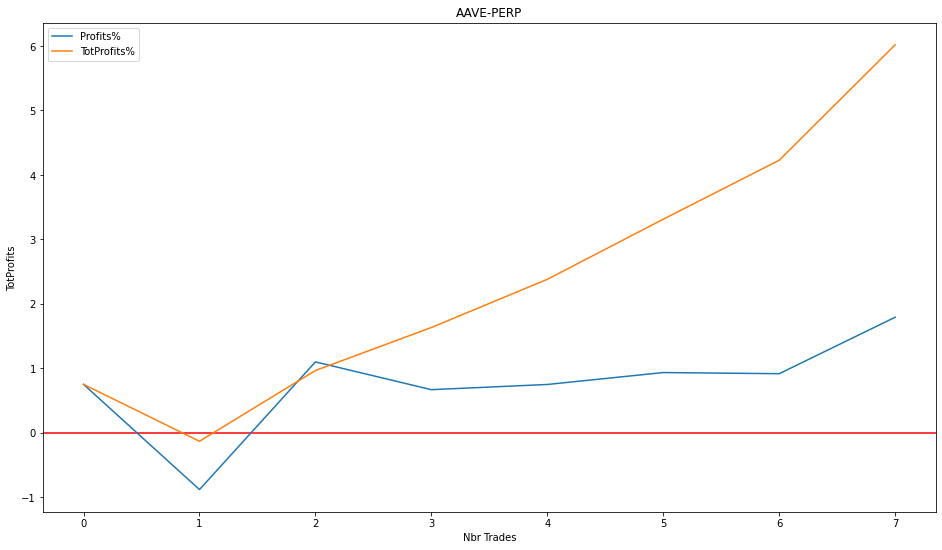

In [ ]:
wr=0
for index, row in profitsdf[27].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[27]['Marché'][0],
        '\nFirst Trade: ', profitsdf[27]['Entry'][0],
        '\nLast Trade:  ', profitsdf[27]['Exit'][len(profitsdf[27].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[27].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[27].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[27]['Profits$'].sum() / len(profitsdf[27].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[27]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[27]['Profits%'].sum() / len(profitsdf[27].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[27]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[27]['ROI'].sum() / len(profitsdf[27].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[27]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[27]['Profits%'].plot(figsize=(16, 9), title=profitsdf[27]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[27]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[27]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[27]['Profits%'], color='#00b894')

XTZ-PERP 
First Trade:  2022-08-19 01:30:11.986199+00:00 
Last Trade:   2022-08-26 22:40:36.755665+00:00 
Nb of Trades: 9 
WinRate:      66.67 % 
$~/Trade:     0.0554 $ 
Total$:       0.4984 $ 
%~/Trade:     -0.18 % 
Total%:       -1.63 % 
ROI~/Trade:   -0.18 % 
TotalROI:     -1.63 %



<AxesSubplot:title={'center':'XTZ-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

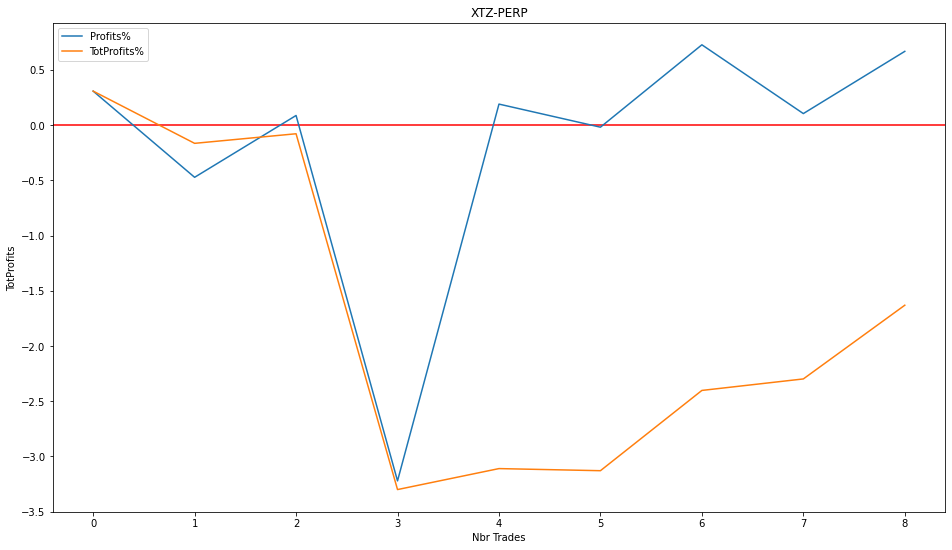

In [ ]:
wr=0
for index, row in profitsdf[28].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[28]['Marché'][0],
        '\nFirst Trade: ', profitsdf[28]['Entry'][0],
        '\nLast Trade:  ', profitsdf[28]['Exit'][len(profitsdf[28].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[28].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[28].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[28]['Profits$'].sum() / len(profitsdf[28].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[28]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[28]['Profits%'].sum() / len(profitsdf[28].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[28]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[28]['ROI'].sum() / len(profitsdf[28].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[28]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[28]['Profits%'].plot(figsize=(16, 9), title=profitsdf[28]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[28]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[28]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[28]['Profits%'], color='#00b894')

RON-PERP 
First Trade:  2022-08-23 01:00:10.279266+00:00 
Last Trade:   2022-08-30 10:46:01.165063+00:00 
Nb of Trades: 3 
WinRate:      100.0 % 
$~/Trade:     10.6905 $ 
Total$:       32.0715 $ 
%~/Trade:     4.2 % 
Total%:       12.61 % 
ROI~/Trade:   4.09 % 
TotalROI:     12.26 %



<AxesSubplot:title={'center':'RON-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

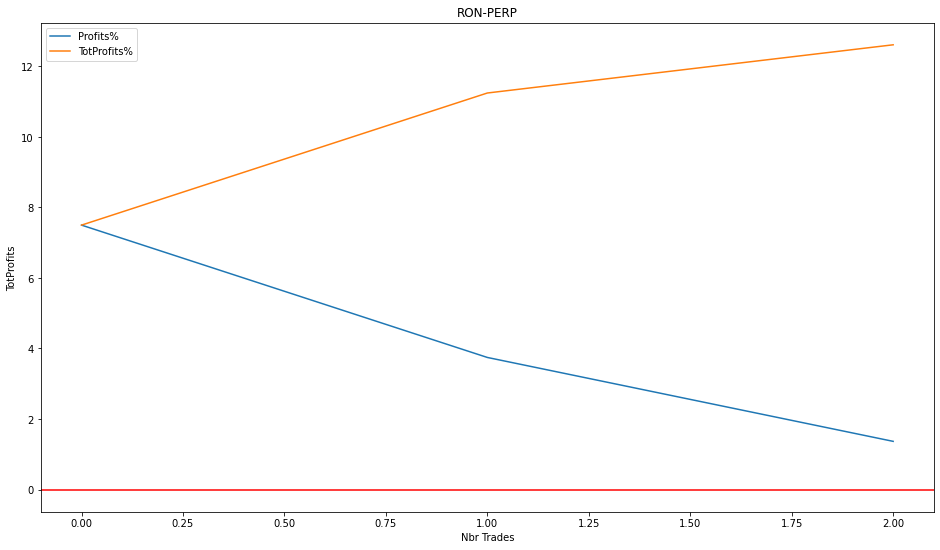

In [ ]:
wr=0
for index, row in profitsdf[29].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[29]['Marché'][0],
        '\nFirst Trade: ', profitsdf[29]['Entry'][0],
        '\nLast Trade:  ', profitsdf[29]['Exit'][len(profitsdf[29].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[29].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[29].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[29]['Profits$'].sum() / len(profitsdf[29].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[29]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[29]['Profits%'].sum() / len(profitsdf[29].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[29]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[29]['ROI'].sum() / len(profitsdf[29].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[29]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[29]['Profits%'].plot(figsize=(16, 9), title=profitsdf[29]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[29]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[29]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[29]['Profits%'], color='#00b894')

ASD-PERP 
First Trade:  2022-08-22 13:00:12.856714+00:00 
Last Trade:   2022-09-02 16:00:41.023880+00:00 
Nb of Trades: 3 
WinRate:      66.67 % 
$~/Trade:     6.958 $ 
Total$:       20.8739 $ 
%~/Trade:     3.57 % 
Total%:       10.72 % 
ROI~/Trade:   3.32 % 
TotalROI:     9.96 %



<AxesSubplot:title={'center':'ASD-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

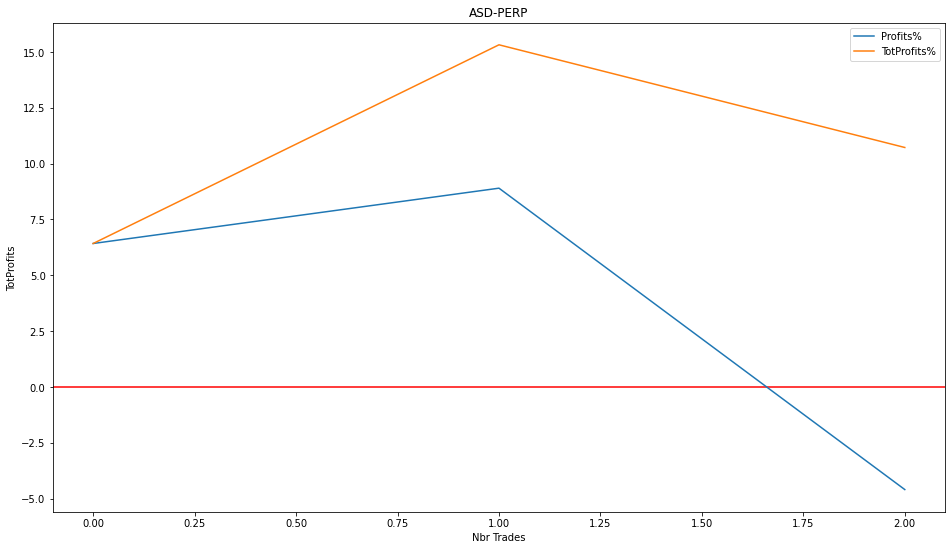

In [ ]:
wr=0
for index, row in profitsdf[30].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[30]['Marché'][0],
        '\nFirst Trade: ', profitsdf[30]['Entry'][0],
        '\nLast Trade:  ', profitsdf[30]['Exit'][len(profitsdf[30].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[30].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[30].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[30]['Profits$'].sum() / len(profitsdf[30].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[30]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[30]['Profits%'].sum() / len(profitsdf[30].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[30]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[30]['ROI'].sum() / len(profitsdf[30].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[30]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[30]['Profits%'].plot(figsize=(16, 9), title=profitsdf[30]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[30]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[30]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[30]['Profits%'], color='#00b894')

DOT-PERP 
First Trade:  2022-08-20 00:00:15.780408+00:00 
Last Trade:   2022-08-20 18:51:39.565007+00:00 
Nb of Trades: 1 
WinRate:      100.0 % 
$~/Trade:     0.063 $ 
Total$:       0.063 $ 
%~/Trade:     0.49 % 
Total%:       0.49 % 
ROI~/Trade:   0.48 % 
TotalROI:     0.48 %



<AxesSubplot:title={'center':'DOT-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

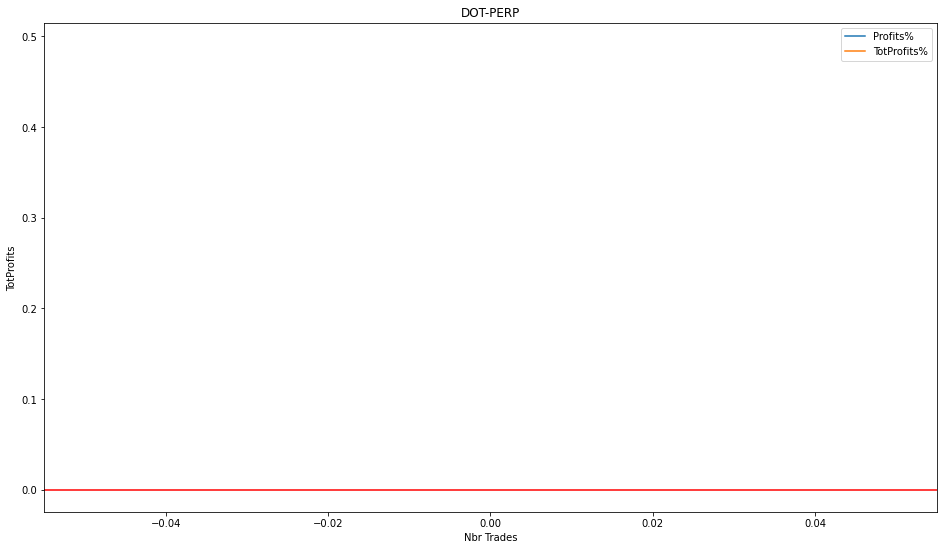

In [ ]:
wr=0
for index, row in profitsdf[31].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[31]['Marché'][0],
        '\nFirst Trade: ', profitsdf[31]['Entry'][0],
        '\nLast Trade:  ', profitsdf[31]['Exit'][len(profitsdf[31].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[31].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[31].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[31]['Profits$'].sum() / len(profitsdf[31].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[31]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[31]['Profits%'].sum() / len(profitsdf[31].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[31]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[31]['ROI'].sum() / len(profitsdf[31].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[31]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[31]['Profits%'].plot(figsize=(16, 9), title=profitsdf[31]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[31]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[31]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[31]['Profits%'], color='#00b894')

In [ ]:
wr=0
for index, row in profitsdf[32].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[32]['Marché'][0],
        '\nFirst Trade: ', profitsdf[32]['Entry'][0],
        '\nLast Trade:  ', profitsdf[32]['Exit'][len(profitsdf[32].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[32].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[32].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[32]['Profits$'].sum() / len(profitsdf[32].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[32]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[32]['Profits%'].sum() / len(profitsdf[32].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[32]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[32]['ROI'].sum() / len(profitsdf[32].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[32]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[32]['Profits%'].plot(figsize=(16, 9), title=profitsdf[32]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[32]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[32]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[32]['Profits%'], color='#00b894')

IndexError: list index out of range

RON-PERP 
First Trade:  2022-08-23 01:00:10.279266+00:00 
Last Trade:   2022-08-30 10:46:01.165063+00:00 
Nb of Trades: 3 
WinRate:      100.0 % 
$~/Trade:     10.6905 $ 
Total$:       32.0715 $ 
%~/Trade:     4.2 % 
Total%:       12.61 % 
ROI~/Trade:   4.09 % 
TotalROI:     12.26 %



<AxesSubplot:title={'center':'RON-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

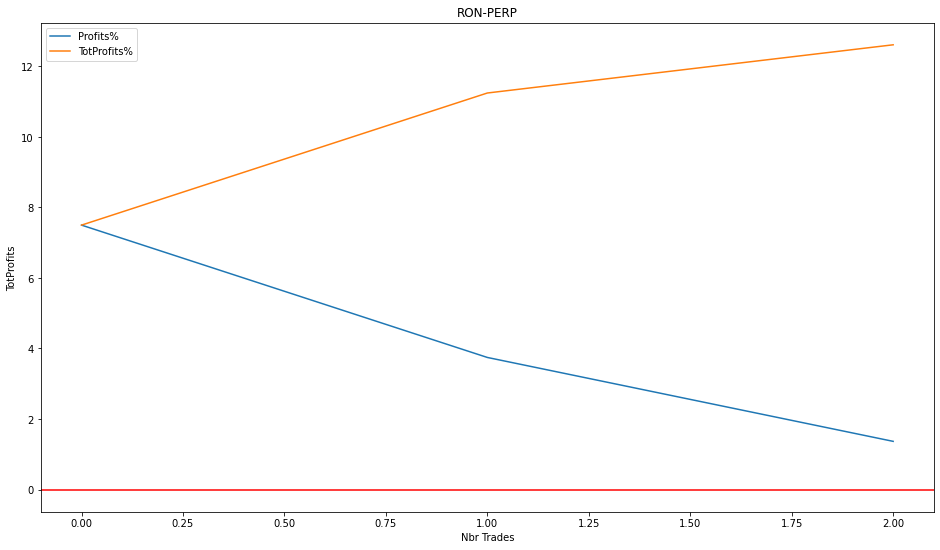

In [ ]:
wr=0
for index, row in profitsdf[33].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[33]['Marché'][0],
        '\nFirst Trade: ', profitsdf[33]['Entry'][0],
        '\nLast Trade:  ', profitsdf[33]['Exit'][len(profitsdf[33].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[33].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[33].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[33]['Profits$'].sum() / len(profitsdf[33].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[33]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[33]['Profits%'].sum() / len(profitsdf[33].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[33]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[33]['ROI'].sum() / len(profitsdf[33].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[33]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[33]['Profits%'].plot(figsize=(16, 9), title=profitsdf[33]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[33]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[33]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[33]['Profits%'], color='#00b894')

ASD-PERP 
First Trade:  2022-08-22 13:00:12.856714+00:00 
Last Trade:   2022-09-02 16:00:41.023880+00:00 
Nb of Trades: 3 
WinRate:      66.67 % 
$~/Trade:     6.958 $ 
Total$:       20.8739 $ 
%~/Trade:     3.57 % 
Total%:       10.72 % 
ROI~/Trade:   3.32 % 
TotalROI:     9.96 %



<AxesSubplot:title={'center':'ASD-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

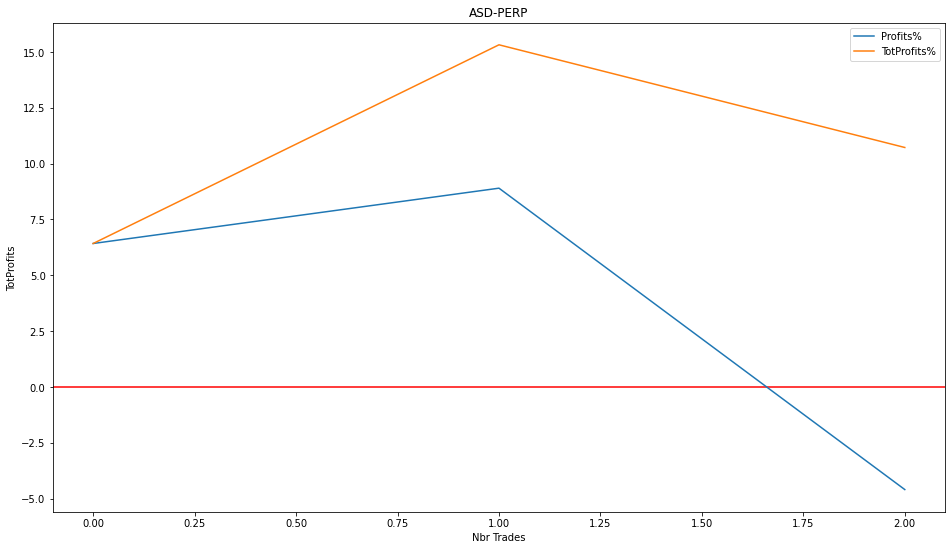

In [ ]:
wr=0
for index, row in profitsdf[34].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[34]['Marché'][0],
        '\nFirst Trade: ', profitsdf[34]['Entry'][0],
        '\nLast Trade:  ', profitsdf[34]['Exit'][len(profitsdf[34].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[34].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[34].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[34]['Profits$'].sum() / len(profitsdf[34].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[34]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[34]['Profits%'].sum() / len(profitsdf[34].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[34]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[34]['ROI'].sum() / len(profitsdf[34].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[34]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[34]['Profits%'].plot(figsize=(16, 9), title=profitsdf[34]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[34]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[34]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[34]['Profits%'], color='#00b894')

TRU-PERP 
First Trade:  2022-08-15 08:00:21.493987+00:00 
Last Trade:   2022-09-04 16:00:16.797735+00:00 
Nb of Trades: 21 
WinRate:      85.71 % 
$~/Trade:     -0.2 $ 
Total$:       -4.1992 $ 
%~/Trade:     -0.08 % 
Total%:       -1.68 % 
ROI~/Trade:   -0.08 % 
TotalROI:     -1.7 %



<AxesSubplot:title={'center':'TRU-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

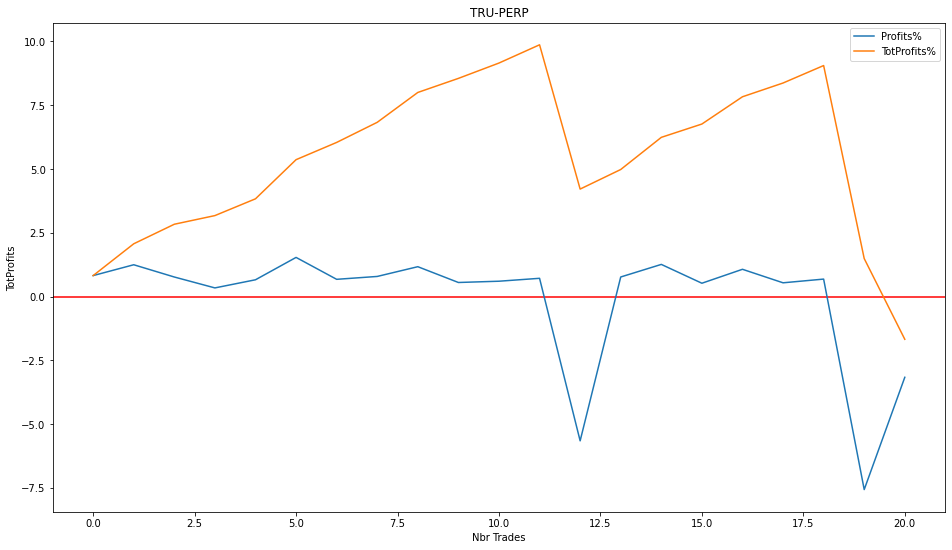

In [ ]:
wr=0
for index, row in profitsdf[35].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[35]['Marché'][0],
        '\nFirst Trade: ', profitsdf[35]['Entry'][0],
        '\nLast Trade:  ', profitsdf[35]['Exit'][len(profitsdf[35].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[35].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[35].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[35]['Profits$'].sum() / len(profitsdf[35].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[35]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[35]['Profits%'].sum() / len(profitsdf[35].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[35]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[35]['ROI'].sum() / len(profitsdf[35].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[35]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[35]['Profits%'].plot(figsize=(16, 9), title=profitsdf[35]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[35]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[35]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[35]['Profits%'], color='#00b894')

DOT-PERP 
First Trade:  2022-08-20 00:00:15.780408+00:00 
Last Trade:   2022-08-20 18:51:39.565007+00:00 
Nb of Trades: 1 
WinRate:      100.0 % 
$~/Trade:     0.063 $ 
Total$:       0.063 $ 
%~/Trade:     0.49 % 
Total%:       0.49 % 
ROI~/Trade:   0.48 % 
TotalROI:     0.48 %



<AxesSubplot:title={'center':'DOT-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

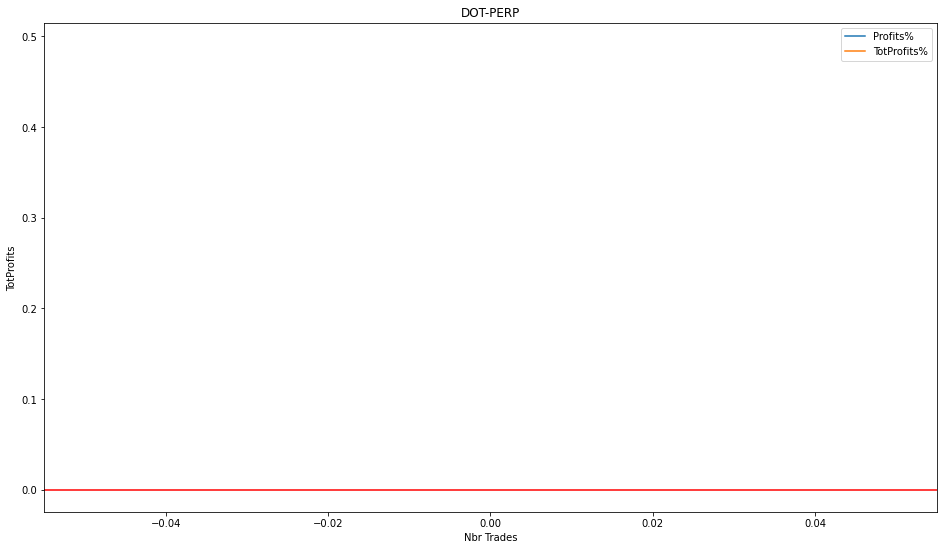

In [ ]:
wr=0
for index, row in profitsdf[36].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[36]['Marché'][0],
        '\nFirst Trade: ', profitsdf[36]['Entry'][0],
        '\nLast Trade:  ', profitsdf[36]['Exit'][len(profitsdf[36].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[36].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[36].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[36]['Profits$'].sum() / len(profitsdf[36].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[36]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[36]['Profits%'].sum() / len(profitsdf[36].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[36]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[36]['ROI'].sum() / len(profitsdf[36].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[36]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[36]['Profits%'].plot(figsize=(16, 9), title=profitsdf[36]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[36]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[36]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[36]['Profits%'], color='#00b894')

In [ ]:
wr=0
for index, row in profitsdf[37].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[37]['Marché'][0],
        '\nFirst Trade: ', profitsdf[37]['Entry'][0],
        '\nLast Trade:  ', profitsdf[37]['Exit'][len(profitsdf[37].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[37].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[37].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[37]['Profits$'].sum() / len(profitsdf[37].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[37]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[37]['Profits%'].sum() / len(profitsdf[37].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[37]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[37]['ROI'].sum() / len(profitsdf[37].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[37]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[37]['Profits%'].plot(figsize=(16, 9), title=profitsdf[37]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[37]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[37]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[37]['Profits%'], color='#00b894')

IndexError: list index out of range

ZIL-PERP 
First Trade:  2022-08-23 12:00:24.449632+00:00 
Last Trade:   2022-09-06 18:00:39.679891+00:00 
Nb of Trades: 6 
WinRate:      16.67 % 
$~/Trade:     -1.3584 $ 
Total$:       -8.1501 $ 
%~/Trade:     -1.04 % 
Total%:       -6.24 % 
ROI~/Trade:   -1.1 % 
TotalROI:     -6.61 %



<AxesSubplot:title={'center':'ZIL-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

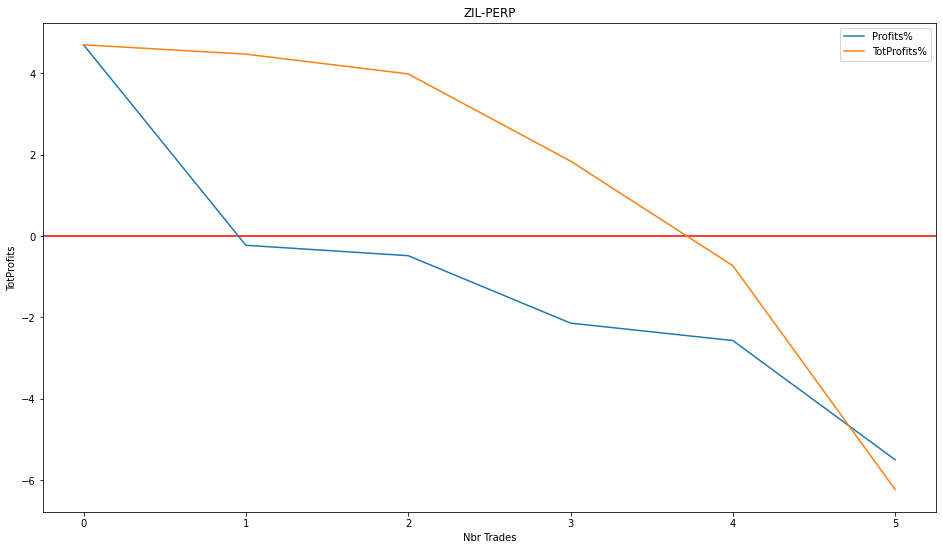

In [ ]:
wr=0
for index, row in profitsdf[38].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[38]['Marché'][0],
        '\nFirst Trade: ', profitsdf[38]['Entry'][0],
        '\nLast Trade:  ', profitsdf[38]['Exit'][len(profitsdf[38].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[38].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[38].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[38]['Profits$'].sum() / len(profitsdf[38].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[38]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[38]['Profits%'].sum() / len(profitsdf[38].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[38]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[38]['ROI'].sum() / len(profitsdf[38].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[38]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[38]['Profits%'].plot(figsize=(16, 9), title=profitsdf[38]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[38]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[38]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[38]['Profits%'], color='#00b894')

RON-PERP 
First Trade:  2022-08-23 01:00:10.279266+00:00 
Last Trade:   2022-08-30 10:46:01.165063+00:00 
Nb of Trades: 3 
WinRate:      100.0 % 
$~/Trade:     10.6905 $ 
Total$:       32.0715 $ 
%~/Trade:     4.2 % 
Total%:       12.61 % 
ROI~/Trade:   4.09 % 
TotalROI:     12.26 %



<AxesSubplot:title={'center':'RON-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

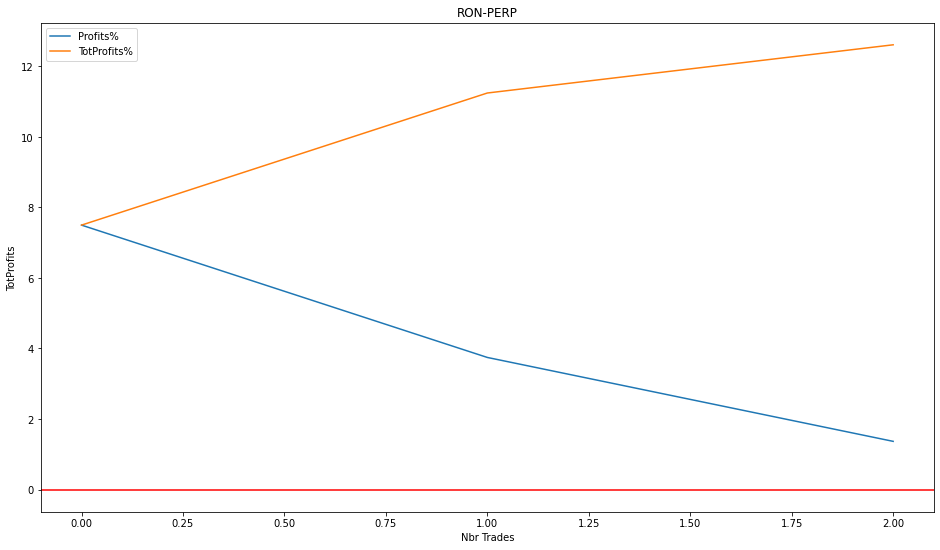

In [ ]:
wr=0
for index, row in profitsdf[39].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[39]['Marché'][0],
        '\nFirst Trade: ', profitsdf[39]['Entry'][0],
        '\nLast Trade:  ', profitsdf[39]['Exit'][len(profitsdf[39].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[39].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[39].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[39]['Profits$'].sum() / len(profitsdf[39].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[39]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[39]['Profits%'].sum() / len(profitsdf[39].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[39]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[39]['ROI'].sum() / len(profitsdf[39].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[39]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[39]['Profits%'].plot(figsize=(16, 9), title=profitsdf[39]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[39]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[39]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[39]['Profits%'], color='#00b894')

ASD-PERP 
First Trade:  2022-08-22 13:00:12.856714+00:00 
Last Trade:   2022-09-02 16:00:41.023880+00:00 
Nb of Trades: 3 
WinRate:      66.67 % 
$~/Trade:     6.958 $ 
Total$:       20.8739 $ 
%~/Trade:     3.57 % 
Total%:       10.72 % 
ROI~/Trade:   3.32 % 
TotalROI:     9.96 %



<AxesSubplot:title={'center':'ASD-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

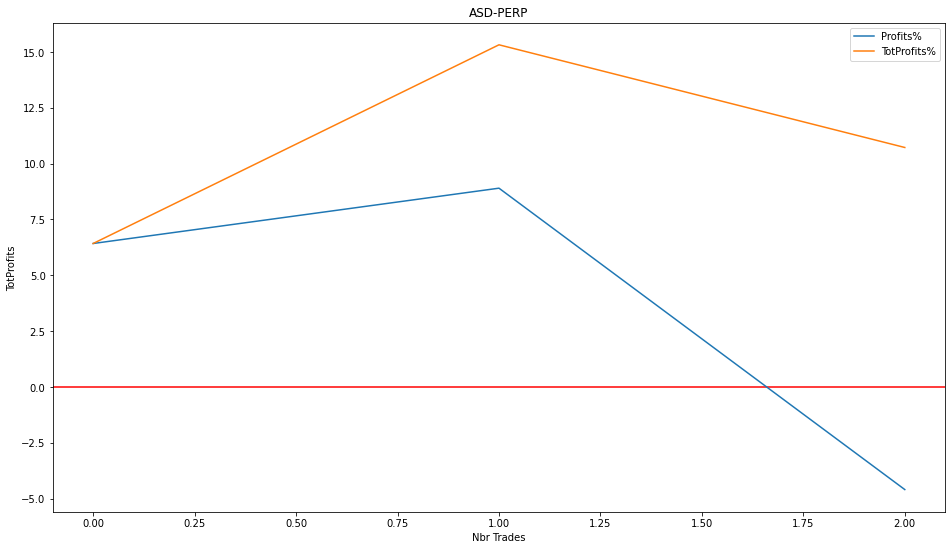

In [ ]:
wr=0
for index, row in profitsdf[40].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[40]['Marché'][0],
        '\nFirst Trade: ', profitsdf[40]['Entry'][0],
        '\nLast Trade:  ', profitsdf[40]['Exit'][len(profitsdf[40].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[40].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[40].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[40]['Profits$'].sum() / len(profitsdf[40].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[40]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[40]['Profits%'].sum() / len(profitsdf[40].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[40]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[40]['ROI'].sum() / len(profitsdf[40].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[40]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[40]['Profits%'].plot(figsize=(16, 9), title=profitsdf[40]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[40]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[40]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[40]['Profits%'], color='#00b894')

SRM-PERP 
First Trade:  2022-08-23 00:00:13.508842+00:00 
Last Trade:   2022-09-04 10:00:10.243056+00:00 
Nb of Trades: 7 
WinRate:      28.57 % 
$~/Trade:     -3.5577 $ 
Total$:       -24.904 $ 
%~/Trade:     -1.27 % 
Total%:       -8.89 % 
ROI~/Trade:   -1.25 % 
TotalROI:     -8.76 %



<AxesSubplot:title={'center':'SRM-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

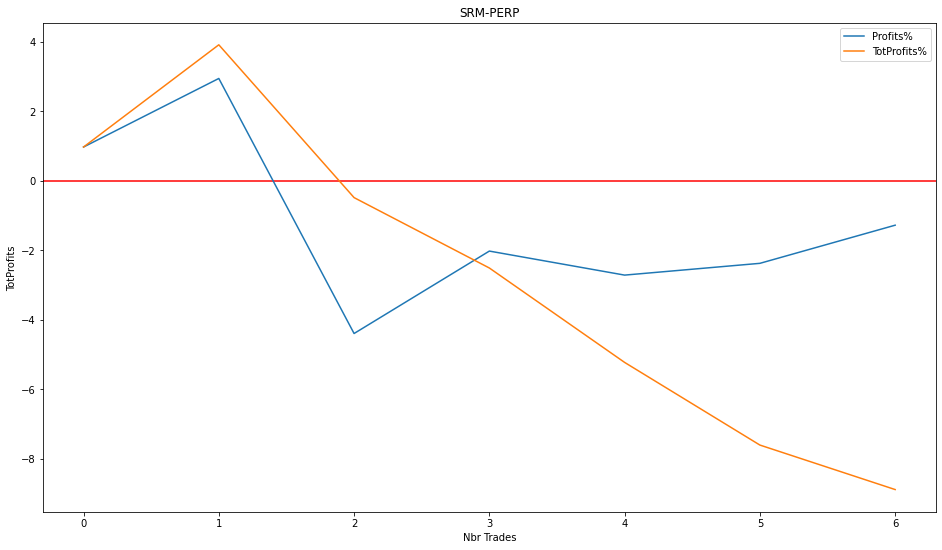

In [ ]:
wr=0
for index, row in profitsdf[41].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[41]['Marché'][0],
        '\nFirst Trade: ', profitsdf[41]['Entry'][0],
        '\nLast Trade:  ', profitsdf[41]['Exit'][len(profitsdf[41].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[41].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[41].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[41]['Profits$'].sum() / len(profitsdf[41].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[41]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[41]['Profits%'].sum() / len(profitsdf[41].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[41]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[41]['ROI'].sum() / len(profitsdf[41].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[41]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[41]['Profits%'].plot(figsize=(16, 9), title=profitsdf[41]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[41]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[41]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[41]['Profits%'], color='#00b894')

TRU-PERP 
First Trade:  2022-08-15 08:00:21.493987+00:00 
Last Trade:   2022-09-04 16:00:16.797735+00:00 
Nb of Trades: 21 
WinRate:      85.71 % 
$~/Trade:     -0.2 $ 
Total$:       -4.1992 $ 
%~/Trade:     -0.08 % 
Total%:       -1.68 % 
ROI~/Trade:   -0.08 % 
TotalROI:     -1.7 %



<AxesSubplot:title={'center':'TRU-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

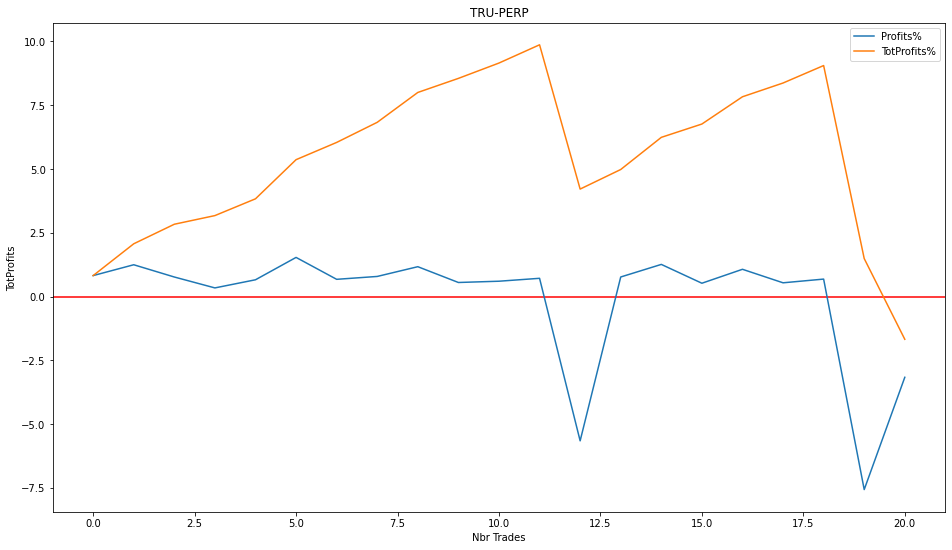

In [ ]:
wr=0
for index, row in profitsdf[42].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[42]['Marché'][0],
        '\nFirst Trade: ', profitsdf[42]['Entry'][0],
        '\nLast Trade:  ', profitsdf[42]['Exit'][len(profitsdf[42].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[42].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[42].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[42]['Profits$'].sum() / len(profitsdf[42].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[42]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[42]['Profits%'].sum() / len(profitsdf[42].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[42]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[42]['ROI'].sum() / len(profitsdf[42].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[42]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[42]['Profits%'].plot(figsize=(16, 9), title=profitsdf[42]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[42]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[42]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[42]['Profits%'], color='#00b894')

DOT-PERP 
First Trade:  2022-08-20 00:00:15.780408+00:00 
Last Trade:   2022-08-20 18:51:39.565007+00:00 
Nb of Trades: 1 
WinRate:      100.0 % 
$~/Trade:     0.063 $ 
Total$:       0.063 $ 
%~/Trade:     0.49 % 
Total%:       0.49 % 
ROI~/Trade:   0.48 % 
TotalROI:     0.48 %



<AxesSubplot:title={'center':'DOT-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

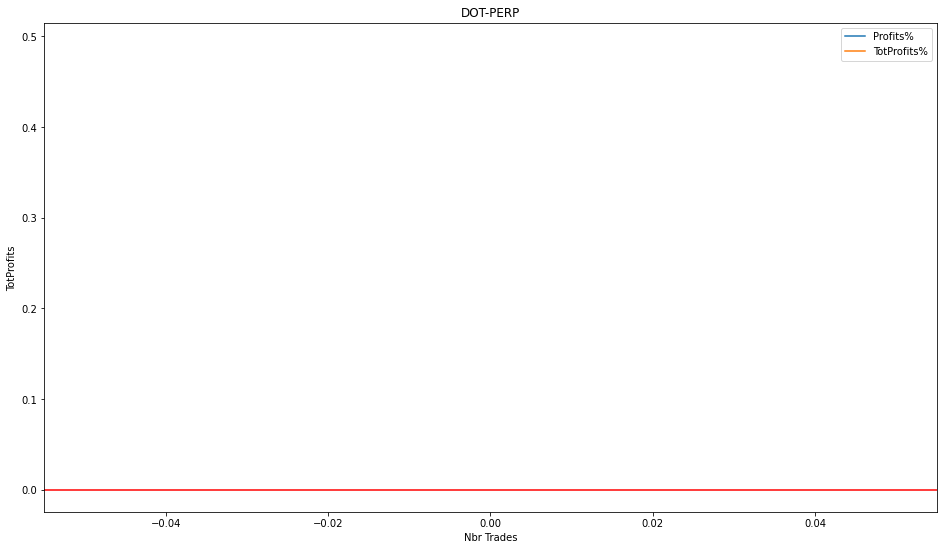

In [ ]:
wr=0
for index, row in profitsdf[43].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[43]['Marché'][0],
        '\nFirst Trade: ', profitsdf[43]['Entry'][0],
        '\nLast Trade:  ', profitsdf[43]['Exit'][len(profitsdf[43].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[43].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[43].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[43]['Profits$'].sum() / len(profitsdf[43].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[43]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[43]['Profits%'].sum() / len(profitsdf[43].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[43]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[43]['ROI'].sum() / len(profitsdf[43].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[43]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[43]['Profits%'].plot(figsize=(16, 9), title=profitsdf[43]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[43]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[43]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[43]['Profits%'], color='#00b894')

In [ ]:
wr=0
for index, row in profitsdf[44].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[44]['Marché'][0],
        '\nFirst Trade: ', profitsdf[44]['Entry'][0],
        '\nLast Trade:  ', profitsdf[44]['Exit'][len(profitsdf[44].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[44].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[44].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[44]['Profits$'].sum() / len(profitsdf[44].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[44]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[44]['Profits%'].sum() / len(profitsdf[44].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[44]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[44]['ROI'].sum() / len(profitsdf[44].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[44]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[44]['Profits%'].plot(figsize=(16, 9), title=profitsdf[44]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[44]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[44]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[44]['Profits%'], color='#00b894')

IndexError: list index out of range

DOT-PERP 
First Trade:  2022-08-20 00:00:15.780408+00:00 
Last Trade:   2022-08-20 18:51:39.565007+00:00 
Nb of Trades: 1 
WinRate:      100.0 % 
$~/Trade:     0.063 $ 
Total$:       0.063 $ 
%~/Trade:     0.49 % 
Total%:       0.49 % 
ROI~/Trade:   0.48 % 
TotalROI:     0.48 %



<AxesSubplot:title={'center':'DOT-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

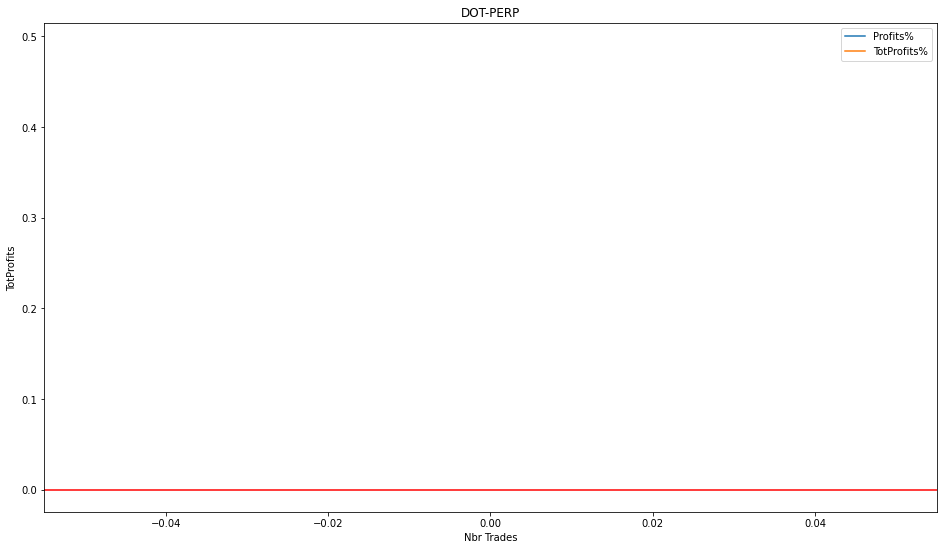

In [ ]:
wr=0
for index, row in profitsdf[45].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[45]['Marché'][0],
        '\nFirst Trade: ', profitsdf[45]['Entry'][0],
        '\nLast Trade:  ', profitsdf[45]['Exit'][len(profitsdf[45].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[45].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[45].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[45]['Profits$'].sum() / len(profitsdf[45].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[45]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[45]['Profits%'].sum() / len(profitsdf[45].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[45]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[45]['ROI'].sum() / len(profitsdf[45].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[45]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[45]['Profits%'].plot(figsize=(16, 9), title=profitsdf[45]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[45]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[45]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[45]['Profits%'], color='#00b894')

In [ ]:
wr=0
for index, row in profitsdf[46].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[46]['Marché'][0],
        '\nFirst Trade: ', profitsdf[46]['Entry'][0],
        '\nLast Trade:  ', profitsdf[46]['Exit'][len(profitsdf[46].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[46].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[46].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[46]['Profits$'].sum() / len(profitsdf[46].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[46]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[46]['Profits%'].sum() / len(profitsdf[46].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[46]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[46]['ROI'].sum() / len(profitsdf[46].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[46]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[46]['Profits%'].plot(figsize=(16, 9), title=profitsdf[46]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[46]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[46]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[46]['Profits%'], color='#00b894')

IndexError: list index out of range

AR-PERP 
First Trade:  2022-09-02 20:00:38.532942+00:00 
Last Trade:   2022-09-03 10:00:11.875728+00:00 
Nb of Trades: 1 
WinRate:      0.0 % 
$~/Trade:     -0.6571 $ 
Total$:       -0.6571 $ 
%~/Trade:     -3.16 % 
Total%:       -3.16 % 
ROI~/Trade:   -3.17 % 
TotalROI:     -3.17 %



<AxesSubplot:title={'center':'AR-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

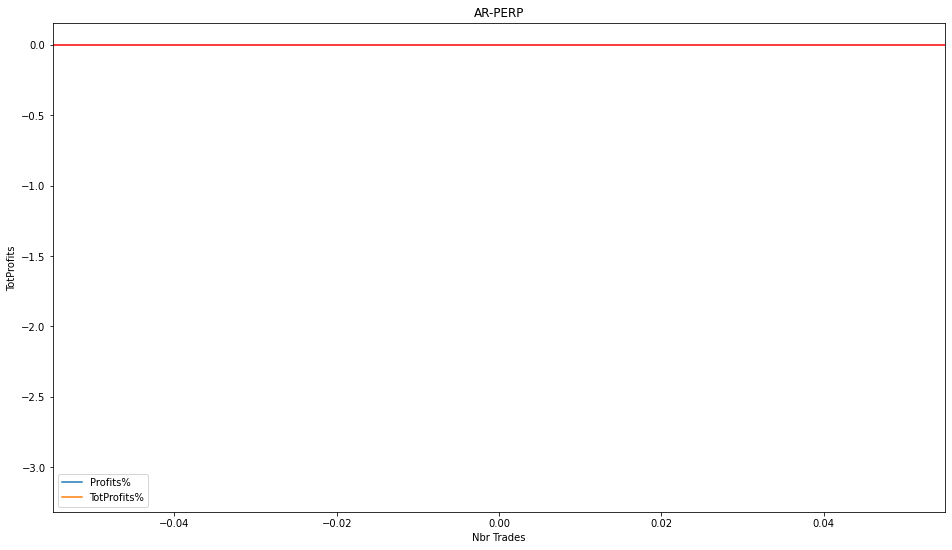

In [ ]:
wr=0
for index, row in profitsdf[47].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[47]['Marché'][0],
        '\nFirst Trade: ', profitsdf[47]['Entry'][0],
        '\nLast Trade:  ', profitsdf[47]['Exit'][len(profitsdf[47].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[47].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[47].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[47]['Profits$'].sum() / len(profitsdf[47].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[47]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[47]['Profits%'].sum() / len(profitsdf[47].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[47]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[47]['ROI'].sum() / len(profitsdf[47].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[47]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[47]['Profits%'].plot(figsize=(16, 9), title=profitsdf[47]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[47]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[47]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[47]['Profits%'], color='#00b894')

1INCH-PERP 
First Trade:  2022-09-02 09:00:11.510435+00:00 
Last Trade:   2022-09-03 01:00:11.304546+00:00 
Nb of Trades: 4 
WinRate:      75.0 % 
$~/Trade:     -0.1046 $ 
Total$:       -0.4184 $ 
%~/Trade:     -0.33 % 
Total%:       -1.3 % 
ROI~/Trade:   -0.33 % 
TotalROI:     -1.3 %



<AxesSubplot:title={'center':'1INCH-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

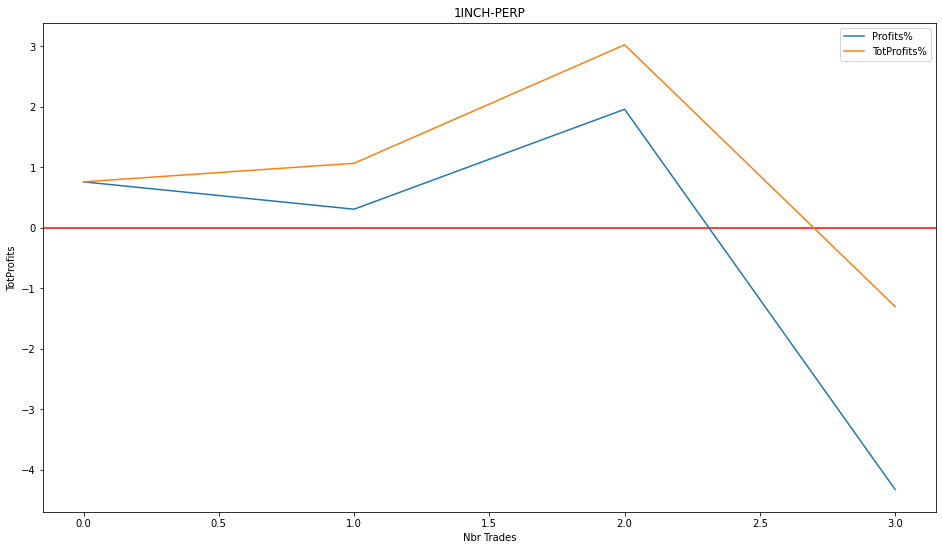

In [ ]:
wr=0
for index, row in profitsdf[48].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[48]['Marché'][0],
        '\nFirst Trade: ', profitsdf[48]['Entry'][0],
        '\nLast Trade:  ', profitsdf[48]['Exit'][len(profitsdf[48].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[48].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[48].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[48]['Profits$'].sum() / len(profitsdf[48].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[48]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[48]['Profits%'].sum() / len(profitsdf[48].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[48]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[48]['ROI'].sum() / len(profitsdf[48].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[48]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[48]['Profits%'].plot(figsize=(16, 9), title=profitsdf[48]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[48]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[48]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[48]['Profits%'], color='#00b894')

RON-PERP 
First Trade:  2022-08-23 01:00:10.279266+00:00 
Last Trade:   2022-08-30 10:46:01.165063+00:00 
Nb of Trades: 3 
WinRate:      100.0 % 
$~/Trade:     10.6905 $ 
Total$:       32.0715 $ 
%~/Trade:     4.2 % 
Total%:       12.61 % 
ROI~/Trade:   4.09 % 
TotalROI:     12.26 %



<AxesSubplot:title={'center':'RON-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

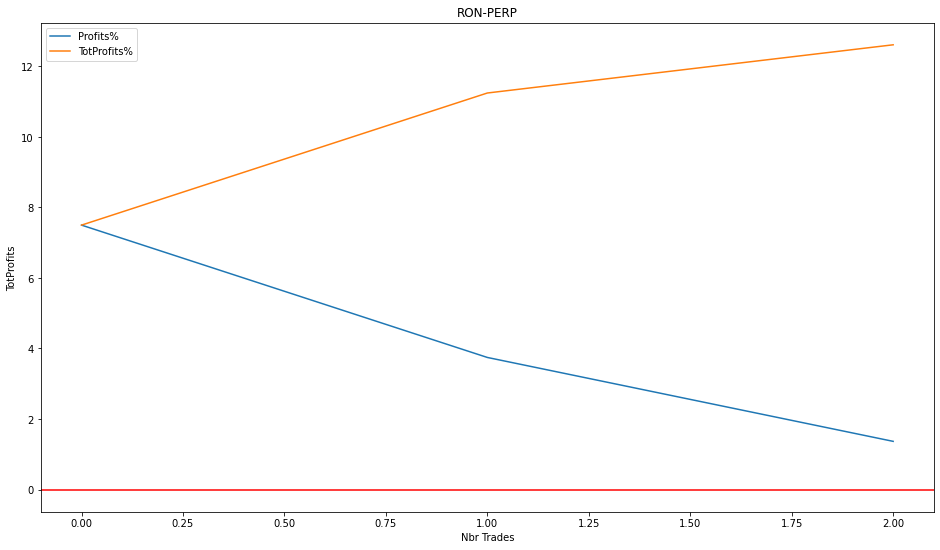

In [ ]:
wr=0
for index, row in profitsdf[49].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[49]['Marché'][0],
        '\nFirst Trade: ', profitsdf[49]['Entry'][0],
        '\nLast Trade:  ', profitsdf[49]['Exit'][len(profitsdf[49].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[49].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[49].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[49]['Profits$'].sum() / len(profitsdf[49].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[49]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[49]['Profits%'].sum() / len(profitsdf[49].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[49]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[49]['ROI'].sum() / len(profitsdf[49].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[49]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[49]['Profits%'].plot(figsize=(16, 9), title=profitsdf[49]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[49]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[49]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[49]['Profits%'], color='#00b894')

XTZ-PERP 
First Trade:  2022-08-19 01:30:11.986199+00:00 
Last Trade:   2022-08-26 22:40:36.755665+00:00 
Nb of Trades: 9 
WinRate:      66.67 % 
$~/Trade:     0.0554 $ 
Total$:       0.4984 $ 
%~/Trade:     -0.18 % 
Total%:       -1.63 % 
ROI~/Trade:   -0.18 % 
TotalROI:     -1.63 %



<AxesSubplot:title={'center':'XTZ-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

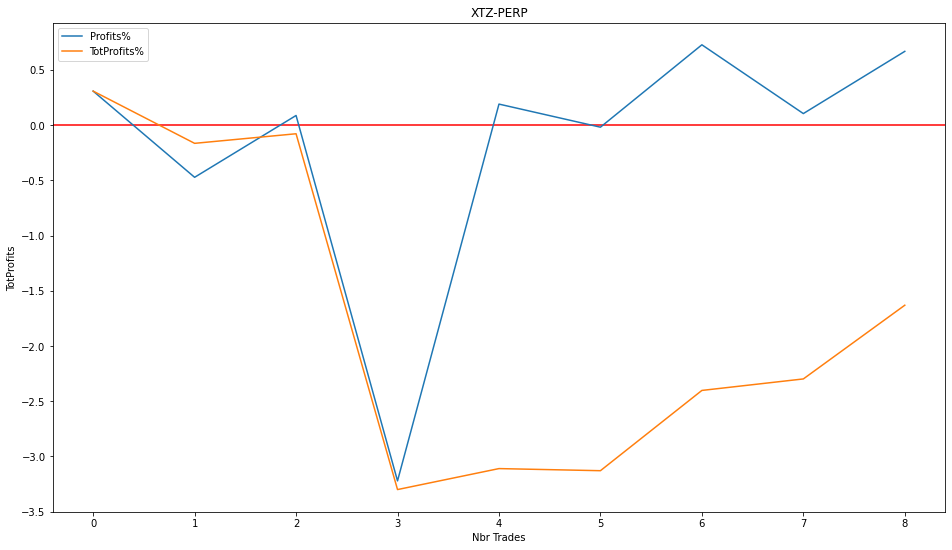

In [ ]:
wr=0
for index, row in profitsdf[50].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[50]['Marché'][0],
        '\nFirst Trade: ', profitsdf[50]['Entry'][0],
        '\nLast Trade:  ', profitsdf[50]['Exit'][len(profitsdf[50].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[50].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[50].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[50]['Profits$'].sum() / len(profitsdf[50].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[50]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[50]['Profits%'].sum() / len(profitsdf[50].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[50]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[50]['ROI'].sum() / len(profitsdf[50].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[50]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[50]['Profits%'].plot(figsize=(16, 9), title=profitsdf[50]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[50]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[50]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[50]['Profits%'], color='#00b894')

DOT-PERP 
First Trade:  2022-08-20 00:00:15.780408+00:00 
Last Trade:   2022-08-20 18:51:39.565007+00:00 
Nb of Trades: 1 
WinRate:      100.0 % 
$~/Trade:     0.063 $ 
Total$:       0.063 $ 
%~/Trade:     0.49 % 
Total%:       0.49 % 
ROI~/Trade:   0.48 % 
TotalROI:     0.48 %



<AxesSubplot:title={'center':'DOT-PERP'}, xlabel='Nbr Trades', ylabel='TotProfits'>

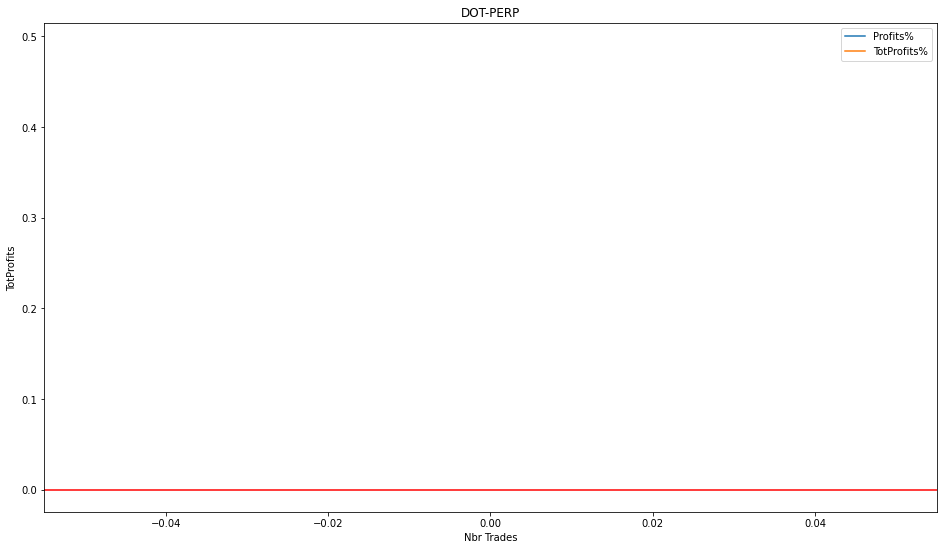

In [ ]:
wr=0
for index, row in profitsdf[51].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[51]['Marché'][0],
        '\nFirst Trade: ', profitsdf[51]['Entry'][0],
        '\nLast Trade:  ', profitsdf[51]['Exit'][len(profitsdf[51].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[51].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[51].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[51]['Profits$'].sum() / len(profitsdf[51].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[51]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[51]['Profits%'].sum() / len(profitsdf[51].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[51]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[51]['ROI'].sum() / len(profitsdf[51].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[51]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[51]['Profits%'].plot(figsize=(16, 9), title=profitsdf[51]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[51]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[51]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[51]['Profits%'], color='#00b894')

In [ ]:
wr=0
for index, row in profitsdf[52].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[52]['Marché'][0],
        '\nFirst Trade: ', profitsdf[52]['Entry'][0],
        '\nLast Trade:  ', profitsdf[52]['Exit'][len(profitsdf[52].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[52].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[52].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[52]['Profits$'].sum() / len(profitsdf[52].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[52]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[52]['Profits%'].sum() / len(profitsdf[52].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[52]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[52]['ROI'].sum() / len(profitsdf[52].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[52]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[52]['Profits%'].plot(figsize=(16, 9), title=profitsdf[52]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[52]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[52]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[52]['Profits%'], color='#00b894')

IndexError: list index out of range

In [ ]:
wr=0
for index, row in profitsdf[53].iterrows():
        if row['Profits$'] > 0:
                wr = wr + 1

print(profitsdf[53]['Marché'][0],
        '\nFirst Trade: ', profitsdf[53]['Entry'][0],
        '\nLast Trade:  ', profitsdf[53]['Exit'][len(profitsdf[53].axes[0])-1],
        '\nNb of Trades:', len(profitsdf[53].axes[0]),
        '\nWinRate:     ', round((wr / len(profitsdf[53].axes[0])) * 100, 2), '%',
        '\n$~/Trade:    ', round(profitsdf[53]['Profits$'].sum() / len(profitsdf[53].axes[0]), 4), '$',
        '\nTotal$:      ', round(profitsdf[53]['Profits$'].sum(), 4), '$',
        '\n%~/Trade:    ', round(profitsdf[53]['Profits%'].sum() / len(profitsdf[53].axes[0]), 2), '%',
        '\nTotal%:      ', round(profitsdf[53]['Profits%'].sum(), 2), '%',
        '\nROI~/Trade:  ', round(profitsdf[53]['ROI'].sum() / len(profitsdf[53].axes[0]), 2), '%',
        '\nTotalROI:    ', round(profitsdf[53]['ROI'].sum(), 2), '%\n')



plt.axhline(y=0, color='r', linestyle='-')
profitsdf[53]['Profits%'].plot(figsize=(16, 9), title=profitsdf[53]['Marché'][0], xlabel='Nbr Trades', ylabel='Profits/Trade', legend=True)
profitsdf[53]['TotProfits%'].plot(figsize=(16, 9), title=profitsdf[53]['Marché'][0], xlabel='Nbr Trades', ylabel='TotProfits', legend=True)
#plt.hist(profitsdf[53]['Profits%'], color='#00b894')

IndexError: list index out of range

In [ ]:
polis['Quantité'].median()

NameError: name 'polis' is not defined

In [ ]:
polis['Quantité'].mean()

58.70721649484536

<AxesSubplot:ylabel='Frequency'>

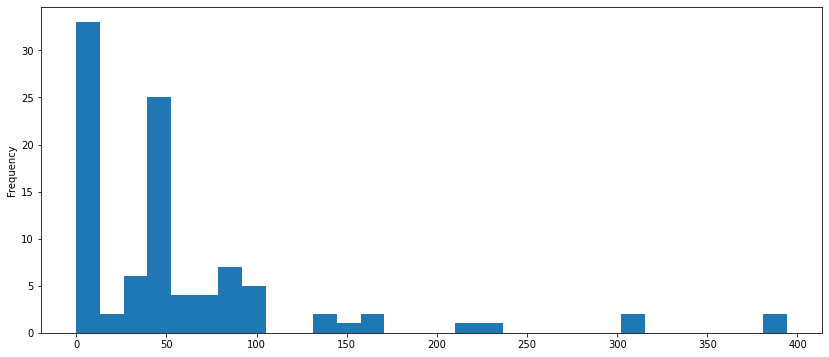

In [ ]:
polis['Quantité'].plot(kind='hist', bins=30, figsize=(14,6))

In [ ]:
polis['Prix'].median()

0.586075

In [ ]:
trades['Quantité'].median()

123.75